In [130]:
!pip install librosa

In [131]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 00C6-083E

 Directory of C:\Users\OVAK\Desktop

10/02/2022  05:19 PM    <DIR>          .
10/02/2022  05:19 PM    <DIR>          ..
10/02/2022  12:38 PM    <DIR>          .ipynb_checkpoints
09/18/2022  02:22 PM            15,859 Adas weekly schedule.xlsx
10/01/2022  11:25 PM    <DIR>          App
10/02/2022  12:38 PM         1,036,574 Audio Classification EDA.ipynb
09/28/2022  08:41 PM    <DIR>          first_repo
10/02/2022  10:59 AM                65 Preprocessing.py
08/29/2022  05:03 PM            69,229 Transcript.pdf
10/02/2022  05:19 PM         1,115,040 Untitled.ipynb
10/02/2022  05:14 PM    <DIR>          UrbanSound8K
09/29/2022  09:08 PM            93,566 yok-ogrenci-belgesi-sorgulama.pdf
               6 File(s)      2,330,333 bytes
               6 Dir(s)  86,998,171,648 bytes free


In [132]:
import IPython.display as ipd
import pandas as pd
import numpy as np
import os
import cv2
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline


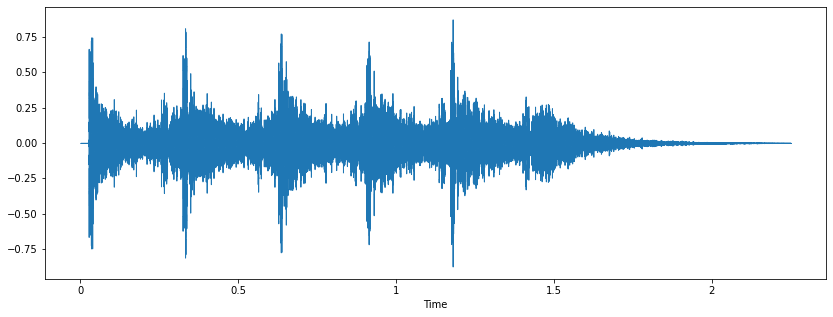

In [153]:
filename='UrbanSound8K/audio/fold3/13230-0-0-1.wav'
plt.figure(figsize=(14,5))
scale, sr=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)


In [154]:
def create_spectrogram(scale, sr):
    spec=librosa.feature.melspectrogram(scale, sr=sr)
    spec.shape
    spec_conv=librosa.amplitude_to_db(spec,ref=np.max)
    return spec_conv

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00216757 -0.00082149 -0.00368989 ... -0.00624099 -0.00013978
  0.00065375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)


array([[-59.471214, -56.774467, -56.82785 , ..., -67.6951  , -55.542343,
        -52.186203],
       [-44.100563, -39.206604, -49.891037, ..., -45.58976 , -46.29477 ,
        -44.788055],
       [-43.909996, -44.88091 , -40.58925 , ..., -28.950697, -34.68531 ,
        -43.9439  ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

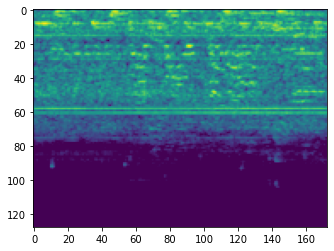

In [157]:
a=create_spectrogram(scale, sr)
plt.imshow(a)
a

In [162]:
import matplotlib.image

matplotlib.image.imsave('UrbanSound8K/name.png', a)

In [136]:
!pip3 install opencv-python

In [137]:
image = cv2.imread('UrbanSound8K/spectrograms/0/13230-0-0-1.png')
type(image)
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  3,   0,   0],
        [  3,   0,   0],
        [  3,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   0,   0],
        [  4,   0,   0],
        [  4,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

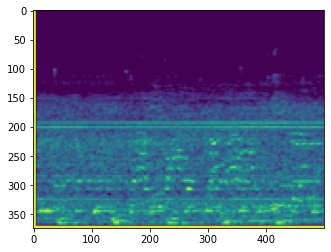

In [138]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
image

In [139]:
img_arr=cv2.resize(image,(224,224))
img_arr

array([[255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       ...,
       [255, 255,  74, ...,  78,  78,  78],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [140]:
folder_path="UrbanSound8K/audio/"

In [141]:
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [142]:
from tqdm import tqdm

In [163]:
extracted_features=[]

for index_num,row in tqdm(metadata.iterrows()):
    audio_path = os.path.join(folder_path,'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    
    scale, sr=librosa.load(audio_path)
    image_spec=create_spectrogram(scale, sr)
    image_path = os.path.join(folder_path,'fold'+str(row["fold"])+'/',(str(row["slice_file_name"])).replace("wav","png"))
    matplotlib.image.imsave(image_path, image_spec)
    
    
    img_arr=cv2.imread(image_path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    img_arr=cv2.resize(img_arr,(224,224))

    
    extracted_features.append([img_arr,final_class_labels])


0it [00:00, ?it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00341243 -0.00506065 -0.00463294 ... -0.00247565 -0.00155365
 -0.00035246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00270739  0.00366005  0.00229772 ... -0.00760908 -0.00455788
  0.00091998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2it [00:00,  8.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00266719 -0.00306487 -0.00157375 ... -0.0012674  -0.00186613
 -0.00208547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3it [00:00, 

25it [00:04,  3.83it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.07341821  0.04584268 -0.04683936 ... -0.02895709  0.03649756
  0.10386023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
26it [00:04,  4.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01864142  0.07681394  0.06767826 ... -0.01571444  0.02876305
  0.05189436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
27it [00:05,  4.31it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04344572  0.02564468 -0.02064971 ... -0.02587995 -0.02228455
 -0.02993995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogr

50it [00:10,  3.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02380064 -0.11180389 -0.1508895  ... -0.11534806 -0.09112641
 -0.05268255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
51it [00:11,  3.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04404337  0.03897814 -0.04120808 ...  0.00833194 -0.07357392
 -0.04559924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
52it [00:11,  4.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01322706 0.0203447  0.01858885 ... 0.04190113 0.10872906 0.16672921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scal

75it [00:17,  3.41it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.09808142 -0.28140113 -0.02465498 ... -0.15964055 -0.29282668
  0.0636866 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
76it [00:17,  3.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.2963795   0.01557446 -0.27261603 ... -0.03598344 -0.02770795
 -0.02541954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
77it [00:18,  2.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02028593 -0.03032197 -0.02112116 ... -0.00884842 -0.07184956
 -0.02539614] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogr

100it [00:30,  3.41it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00203659 -0.0064973  -0.00759529 ... -0.00633357 -0.00606129
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
101it [00:30,  3.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00829403  0.00853538  0.00082092 ... -0.00057056 -0.0061864
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00732014  0.01761405 -0.0217674  ...  0.00352043  0.00856209
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Us

125it [00:35,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.08123443 -0.12392304 -0.12653725 ...  0.1298668   0.1230984
  0.11258616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
126it [00:35,  5.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02144891 0.0364002  0.03935423 ... 0.10430526 0.10167279 0.12960035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
127it [00:35,  4.92it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0650016   0.11195163  0.1036722  ... -0.17516924 -0.16780433
 -0.17950836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(sc

150it [00:40,  5.20it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.18952131 -0.28869957 -0.24606061 ...  0.17008057  0.15649332
  0.14860588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
151it [00:40,  5.08it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.05024218 0.07099455 0.09196779 ... 0.05364485 0.05422349 0.06099351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
152it [00:40,  5.16it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.10640296  0.14199401  0.0987185  ... -0.10701266 -0.0993747
 -0.10498606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(sc

175it [00:45,  4.26it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05688298 -0.077624   -0.0355182  ...  0.02160047  0.00704986
  0.01919333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
176it [00:45,  4.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00930018  0.02950276  0.01497604 ... -0.01632855 -0.02291818
  0.00283161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
177it [00:45,  4.16it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01917721  0.02511839  0.02424313 ... -0.03044053 -0.01352816
 -0.00550894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

200it [00:50,  6.39it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.1418252   0.10998494  0.04193929 ... -0.13048713 -0.19594981
 -0.17695373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
201it [00:50,  6.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.08323576 0.12162093 0.1428578 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.16770373 -0.08749244
  0.04727244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
203it [00:5

225it [00:55,  4.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00479327 0.00748611 0.00688364 ... 0.01317284 0.01222996 0.01153632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
226it [00:55,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00836233 -0.01424637 -0.01401451 ... -0.00398561 -0.00362683
 -0.00430288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
227it [00:55,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00717538 0.01024985 0.00739521 ... 0.01270733 0.0088831  0.00807259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, s

250it [01:00,  4.83it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01050174 0.01596922 0.01465018 ... 0.01545692 0.01487302 0.0145453 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
251it [01:00,  4.61it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-5.302536e-03 -8.924781e-03 -9.125903e-03 ... -3.946952e-03 -2.010891e-03
  2.163630e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
252it [01:00,  4.89it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00901038  0.01251516  0.01041526 ... -0.02340867 -0.02152971
 -0.02093983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.mels

274it [01:05,  5.51it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04735803 -0.06582165 -0.01186529 ...  0.02993976  0.03726073
 -0.0015265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
275it [01:05,  5.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04419547 -0.11808536 -0.08595675 ... -0.12928286 -0.11943364
 -0.04759323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
276it [01:05,  5.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04583448  0.10432015  0.08857951 ... -0.05750848 -0.04408766
 -0.00555518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

299it [01:16,  3.34it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05219552 -0.04643504  0.06734273 ... -0.01278799 -0.00800633
  0.00289552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
300it [01:16,  3.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.03892635 0.15826955 0.11220454 ... 0.06307516 0.02188512 0.05298367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
301it [01:17,  3.98it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00431171 -0.07322118  0.01909086 ...  0.00733229  0.04409039
  0.01587849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(s

323it [01:21,  4.84it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00439149 -0.0138774  -0.01463768 ...  0.00196561  0.00696317
 -0.00840846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
324it [01:21,  4.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00702621 -0.00084504  0.00186146 ...  0.00106865  0.00508151
  0.0021424 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
325it [01:22,  4.57it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 3.6539929e-03 -8.7001579e-05 -1.6071551e-02 ...  2.2235198e-02
 -5.0324621e-03 -4.0202970e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa

348it [01:26,  4.48it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04101573 -0.01534235  0.04435787 ... -0.01565098 -0.01828583
 -0.00513177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
349it [01:27,  4.66it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02288868 -0.02560653 -0.01655045 ...  0.0017476  -0.01853926
 -0.00109852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
350it [01:27,  4.67it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00019426  0.01877973 -0.0024141  ... -0.01081283  0.00233918
  0.01336842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

373it [01:31,  5.08it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00536298  0.00794732 -0.00032965 ... -0.00143948 -0.00105423
 -0.00091782] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
374it [01:32,  4.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00269884 -0.00386674 -0.00259962 ... -0.0022755  -0.00993824
  0.00386384] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
375it [01:32,  4.82it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02279436 -0.02934167 -0.0135645  ...  0.01098553  0.00961453
  0.00637681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

398it [01:37,  5.19it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01110631 -0.02307835 -0.01452508 ...  0.00601454  0.02454742
  0.02122768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
399it [01:37,  5.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.14565653  0.12940708  0.03086951 ... -0.0335584  -0.00322185
  0.01847411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
400it [01:37,  5.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00228886  0.00908916  0.00528826 ...  0.01247177 -0.07492668
  0.02888665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

422it [01:41,  5.31it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00066013  0.0010796   0.0015319  ... -0.00139064  0.00187846
  0.00681901] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
423it [01:42,  5.23it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00773874 -0.01273319 -0.01174351 ...  0.00177234  0.00386824
  0.00618987] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
424it [01:42,  5.48it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0080243   0.01505107  0.01572552 ...  0.00929525  0.00311118
 -0.00467206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

447it [01:46,  5.08it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03064895 -0.05441678 -0.05739134 ... -0.01617988 -0.02475354
 -0.0193396 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
448it [01:46,  5.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03756839 -0.02013018  0.01930043 ...  0.0253422   0.02505807
  0.01378699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
449it [01:46,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00547342  0.01153777  0.01372027 ... -0.00156097  0.01154747
  0.01900529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

472it [01:51,  4.74it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.181815   -0.27734634 -0.23684019 ...  0.08252864  0.0713869
  0.0436894 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
473it [01:51,  4.89it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.19924422 -0.30965978 -0.27388653 ...  0.12132961  0.11838315
  0.1209825 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
474it [01:51,  5.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02253682 -0.03995443 -0.04465661 ... -0.02584365 -0.02361253
 -0.01935141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectro

498it [01:56,  7.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00512102 -0.02090292 -0.03347859 ... -0.00788531  0.004038
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01118936 -0.01692691 -0.01368678 ...  0.01725828  0.02186177
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04338387 -0.10677831 -0.11439868 ...  0.0390861   0.03802732
  0.0322312 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
501it [01:56,  8.91it/s]C:\Use

523it [02:00,  5.33it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.20689802 -0.3169728  -0.25699243 ...  0.44953397  0.3679442
  0.23468748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
524it [02:00,  5.23it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.13420431 -0.22579716 -0.19425768 ... -0.15407011 -0.16161895
 -0.18022491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
525it [02:00,  5.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06349079 -0.01223967 -0.16309783 ...  0.07644919  0.06873309
  0.04307399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectro

548it [02:05,  5.25it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.11670502 -0.01584649  0.02087475 ...  0.08978668  0.05251137
 -0.01465212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
549it [02:05,  5.32it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00938792 -0.09784544 -0.16480592 ...  0.06970814  0.01543334
 -0.05938147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
550it [02:05,  5.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03828833  0.1802495   0.00852222 ... -0.02462705 -0.00750097
 -0.01862214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

573it [02:09,  4.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01078246 0.01544377 0.01419258 ... 0.02301341 0.0176768  0.0126072 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
574it [02:09,  5.16it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.05655428 0.07969594 0.06619566 ... 0.02779909 0.03264335 0.03957934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
575it [02:09,  4.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03048405 -0.03406423 -0.0184593  ... -0.03886333 -0.07815937
 -0.07397114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, s

598it [02:14,  4.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00043792 0.00139224 0.00083039 ... 0.01151057 0.00694478 0.00491448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
599it [02:14,  4.88it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00314017 0.00521568 0.00528418 ... 0.00121391 0.00282634 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
600it [02:14,  5.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00094247 -0.0015929  -0.00159512 ... -0.06075519 -0.05099256
 -0.03437414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, s

623it [02:18,  5.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06515981 -0.09956558 -0.08971015 ...  0.01524463  0.01229676
  0.00993643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
624it [02:18,  5.32it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00464992  0.00377932 -0.00022693 ...  0.01025218  0.00818673
  0.0065012 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
625it [02:18,  4.96it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05970327 -0.09709398 -0.08641343 ...  0.05053991  0.06182972
  0.07049676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

648it [02:23,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06754394 -0.08221803 -0.06203746 ...  0.19142267  0.20702548
  0.24414012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
649it [02:23,  4.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02335107 0.04890767 0.07265341 ... 0.01742982 0.01048605 0.01582865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
650it [02:23,  4.73it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01943284 0.02647325 0.01475837 ... 0.03489117 0.03886721 0.04175245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, s

673it [02:28,  4.67it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0435892   0.06832869
  0.09107769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
674it [02:29,  3.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.2863743   0.31644222  0.29235128 ... -0.05552696 -0.0433079
 -0.01413592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
675it [02:29,  3.88it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0053297   0.05999269  0.17613323 ...  0.3566103   0.36994535
  0.45062047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectro

698it [02:40,  2.49it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00365177 -0.00559039 -0.0018865  ... -0.03387637 -0.03457936
 -0.03725264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
699it [02:41,  2.61it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01624872  0.02991486  0.02423535 ... -0.02887641 -0.02662359
 -0.02600676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
700it [02:41,  2.66it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02021474 -0.03746863 -0.03360608 ...  0.07598849  0.06893545
  0.08043757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

723it [02:52,  1.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00182265 0.00284695 0.000562   ... 0.00972876 0.00976477 0.01101321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
724it [02:52,  1.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00389673  0.00895738  0.00903108 ...  0.00098085 -0.00123965
 -0.00079976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
725it [02:53,  1.82it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00610392  0.01106458  0.00954114 ... -0.01547273 -0.013995
 -0.01751226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(sca

747it [03:03,  1.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0079917  0.01454969 0.01129564 ... 0.10311422 0.09367462 0.09814346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
748it [03:03,  2.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04340397  0.07858782  0.06658725 ... -0.01560981 -0.01264582
 -0.01036536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
749it [03:04,  1.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00693634  0.0349059  -0.00715092 ...  0.45080155  0.4040385
  0.42919695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(sc

773it [03:10,  4.73it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01760405 -0.02726317 -0.02556322 ... -0.00457646 -0.00736875
 -0.01032241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
774it [03:11,  4.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00330089 -0.00402516 -0.00269712 ...  0.04321794  0.04389012
  0.04622364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
775it [03:11,  4.98it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03098755  0.04409013  0.03614254 ... -0.00415286  0.00014256
  0.00524754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

798it [03:15,  5.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00397592 -0.00044827  0.00347309 ...  0.00839273  0.00037169
 -0.00726842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
799it [03:15,  5.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01299466 -0.00853874  0.00837648 ...  0.00988429  0.00674006
  0.0089057 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00517609  0.01312572  0.01545758 ... -0.00419854 -0.00435204
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
801i

823it [03:19,  7.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00037925 -0.00111352 -0.00096353 ... -0.00052382 -0.00030559
 -0.00019527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
824it [03:19,  6.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-7.9296544e-05 -1.0469926e-04 -1.1026883e-04 ... -1.3917507e-02
  1.2502866e-02  4.2262044e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
825it [03:20,  6.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01874733 -0.06917135 -0.10959324 ... -0.02849391  0.01703523
  0.03741492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa

847it [03:24,  5.40it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06503293 -0.10669159 -0.10543245 ... -0.02636319 -0.02696443
 -0.04148039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
848it [03:24,  5.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02467896 -0.03766159 -0.03025783 ... -0.02424743 -0.01622613
 -0.00552057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
849it [03:24,  5.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-8.0563332e-06 -3.2360978e-05 -2.9416875e-05 ... -7.5521536e-02
 -6.3203655e-02 -4.2145662e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa

872it [03:28,  5.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00543455  0.00805846  0.00721551 ... -0.01873856 -0.01924378
 -0.01946976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
873it [03:29,  5.23it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00431784  0.00699788  0.00570772 ... -0.01504164 -0.01507482
 -0.01604871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
874it [03:29,  4.48it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00843568 -0.01376177 -0.01351199 ...  0.00210268  0.00209251
  0.0021508 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

896it [03:34,  4.20it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00287452  0.00508113  0.00484722 ... -0.01787003 -0.01873284
 -0.019091  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
897it [03:34,  4.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01139897  0.01571883  0.01229017 ... -0.0068914  -0.00508071
 -0.00288655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
898it [03:34,  4.33it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.9313825e-02  2.7595457e-02  2.0335799e-02 ... -1.2023439e-05
  9.6970529e-04  1.0075972e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03406372 -0.04745661 -0.02630679 ...  0.01939899  0.02126923
  0.01248846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
922it [03:38, 11.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01660765 -0.03154386 -0.03293798 ... -0.01596021 -0.01725405
 -0.02008215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00386    -0.00102055 -0.00410927 ... -0.00874238 -0.00380895
  0.00272569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
924it [03:38,  8.43it/s]C:\U

946it [03:43,  4.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01057946 -0.01205943 -0.00922881 ... -0.04265164 -0.04312714
 -0.04220174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
947it [03:43,  4.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05032293 -0.0734201  -0.06138941 ...  0.11852829  0.1154967
  0.12212283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
948it [03:43,  4.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02691532 -0.038488   -0.03158095 ...  0.01107994  0.00853719
  0.00514573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectro

971it [03:48,  4.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.23112501  0.40268216  0.38322005 ... -0.09661847 -0.13923815
 -0.18205075] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
972it [03:48,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02023075  0.02383437  0.02587794 ... -0.01220102 -0.00911751
 -0.02757382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
973it [03:49,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.12895781 -0.18921906 -0.13596162 ...  0.06735579  0.05781074
  0.03185377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectr

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04208118 -0.06291494 -0.0668323  ... -0.00387712 -0.00278162
 -0.02093827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
997it [03:54,  6.04it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04498443  0.05864569  0.039967   ...  0.00434377 -0.01554738
 -0.02761822] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
998it [03:54,  5.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0151006  -0.01504399 -0.01619614 ...  0.0038518   0.02605852
  0.0524768 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
999i

1021it [03:59,  4.26it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0008035  -0.00980933 -0.01015038 ...  0.04249695  0.03089711
  0.02487766] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1022it [03:59,  4.55it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02446775  0.01406596  0.00976337 ... -0.0298874  -0.00145219
 -0.06727639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1023it [03:59,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01755403  0.03007666  0.025488   ... -0.09062631 -0.09532208
 -0.10856266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

1045it [04:04,  5.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0121432  -0.00798083 -0.05385634 ...  0.05549701  0.0198117
 -0.00629834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1046it [04:04,  5.05it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04769074  0.1311186   0.15779595 ... -0.03426137 -0.03685484
 -0.03884829] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1047it [04:04,  4.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00293767  0.02395719  0.05674786 ...  0.00855456  0.01531776
  0.02529579] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

1070it [04:09,  5.40it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01720823 -0.04399057 -0.13131408 ... -0.00348286 -0.02075655
 -0.02749627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1071it [04:09,  5.13it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04427985  0.10084185  0.1328786  ... -0.11203033 -0.1248806
 -0.1524334 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1072it [04:09,  5.15it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01169098 -0.00905131 -0.02028291 ... -0.01243628  0.01580447
  0.03946372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

1095it [04:13,  5.19it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00384655  0.03721143  0.17584458 ... -0.0263471   0.01406892
  0.03953985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1096it [04:13,  5.20it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01033593 0.05971351 0.00810927 ... 0.01003918 0.00314807 0.04841133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1097it [04:13,  5.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.05717679  0.06491387  0.00063641 ...  0.05575022  0.08353562
 -0.01090282] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1120it [04:18,  4.82it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0496965  -0.12228269 -0.13456948 ... -0.05004683 -0.03363606
 -0.03976012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1121it [04:18,  5.11it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00135697  0.06003096  0.00495556 ...  0.06974827  0.01413771
 -0.01560285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1122it [04:18,  5.08it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01829334  0.02251646 -0.02622779 ... -0.02663811 -0.06339592
  0.02881474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

1144it [04:23,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.16607353 0.23868768 0.1968049  ... 0.0532889  0.11896405 0.20455216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1145it [04:23,  4.84it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00379599 0.00524024 0.00461426 ... 0.00816338 0.00941452 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02112046  0.03155922  0.02802941 ... -0.00844619 -0.00831201
 -0.00923034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1147it [04:23,  

1169it [04:27,  4.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00256787  0.01521411  0.03028816 ... -0.01868612 -0.01102972
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1170it [04:27,  5.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00080629 -0.00325045 -0.00488509 ... -0.06248171 -0.05877882
 -0.06607739] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1171it [04:28,  5.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00245582  0.00503597  0.00487325 ... -0.00258564 -0.0028319
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

1194it [04:32,  4.26it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00131704 -0.00291727 -0.00489266 ... -0.01540862 -0.00743015
 -0.00152434] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1195it [04:33,  4.32it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01104586 -0.01112215  0.00343929 ... -0.00125969 -0.00247612
 -0.00110287] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1196it [04:33,  4.42it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00209409 0.00910838 0.01187203 ... 0.00670784 0.0061822  0.00581997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1219it [04:40,  2.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01230832  0.02357082  0.05315272 ... -0.17693837 -0.13306245
 -0.08684041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1220it [04:40,  2.45it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.10025885 -0.09726503 -0.02618286 ...  0.00174571  0.00529805
 -0.01633025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1221it [04:41,  2.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00042509 -0.00323147 -0.00347655 ... -0.05406184 -0.1368398
 -0.07241882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

1244it [04:47,  4.11it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00217029  0.01054945  0.04302332 ... -0.0056614  -0.00833949
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1245it [04:47,  4.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02691605  0.00106631 -0.0190176  ...  0.01615886  0.0261308
  0.06512214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1246it [04:47,  4.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00694733 0.00914712 0.0003071  ... 0.0370726  0.05310189 0.0505253 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00827152 -0.00861578 -0.00064697 ... -0.00428627  0.00618737
  0.03548334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1270it [04:52,  5.14it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04380546 -0.05751488 -0.02165002 ... -0.01899141  0.0052053
  0.0290141 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1271it [04:52,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00637814 -0.02835491 -0.01339009 ... -0.01398793 -0.00094188
 -0.01195726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
127

1293it [04:57,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01344677 -0.02199433 -0.02027598 ...  0.05910243  0.05469315
  0.05910757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1294it [04:57,  5.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00117533 -0.00564554 -0.00688607 ...  0.00898097  0.01034213
  0.00846   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1295it [04:57,  4.84it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01174325  0.01175467  0.00186844 ... -0.01096584 -0.02450106
 -0.01772666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

1318it [05:01,  6.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02162295  0.03025188  0.02582974 ... -0.00946587 -0.00298355
  0.00274426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1319it [05:01,  6.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02499596 0.03440668 0.02820377 ... 0.03311328 0.03602301 0.03928921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1320it [05:01,  5.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00940524 -0.0091842   0.00470432 ...  0.09367023  0.08191538
  0.08649517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1343it [05:07,  5.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01509065 0.02811838 0.03414793 ... 0.01396571 0.01625452 0.0172443 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1344it [05:07,  5.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00429636 -0.01181004 -0.01559684 ... -0.02535474 -0.02254227
 -0.01510671] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1345it [05:07,  5.31it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0032352   0.00101595  0.01137139 ... -0.00854874 -0.00683173
  0.00230721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1368it [05:12,  4.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.17996342 -0.3252192  -0.35667884 ... -0.04065702 -0.08468744
 -0.11443815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1369it [05:13,  4.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.36522058 0.5291367  0.43131614 ... 0.21555047 0.2125851  0.24354458] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1370it [05:13,  4.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0733723  -0.09405985 -0.06740621 ...  0.1305093   0.15621378
  0.186652  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1393it [05:20,  4.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04552925 -0.06849886 -0.05776553 ... -0.04778465 -0.03749911
 -0.03705505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1394it [05:21,  4.44it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.12631343 -0.17688331 -0.13566364 ...  0.05594634  0.06273645
  0.06780173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1395it [05:21,  4.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0340937  -0.05961491 -0.06619222 ...  0.17275818  0.17327224
  0.17176892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

1418it [05:25,  7.34it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.10379552  0.10091302  0.05700375 ... -0.00372985 -0.08940288
 -0.07911278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1419it [05:25,  6.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.11081048 -0.08201871 -0.01335432 ... -0.08818506 -0.08004266
 -0.04366548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1420it [05:25,  6.43it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00083086  0.00173566  0.00224577 ... -0.00891537  0.05509406
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

1443it [05:28,  5.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.063286   -0.12473971 -0.18200737 ... -0.2700902  -0.27046442
 -0.26203382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1444it [05:28,  5.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.11744591 0.22890168 0.24905106 ... 0.24833272 0.24213274 0.12053607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1445it [05:29,  5.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.14796577 -0.170527   -0.07936412 ...  0.33699548  0.36027524
  0.23333092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1468it [05:32,  5.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.10020363  0.09369186 -0.01100496 ...  0.2782897   0.26897293
  0.22495337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1469it [05:32,  4.96it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.11114829  0.16943313  0.1558517  ... -0.20777369 -0.16489622
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1470it [05:33,  5.49it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03752523 -0.02744536 -0.16555469 ... -0.3537085  -0.25717956
 -0.18497443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02508377 -0.04311319 -0.02429631 ... -0.24899042 -0.25062704
 -0.2501183 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1494it [05:35, 11.67it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00782631 -0.00996965 -0.00736133 ... -0.03573364 -0.03087163
 -0.02499251] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00519633  0.0025272   0.00202913 ... -0.05189614 -0.02676383
 -0.00081364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1496it [05:35,  8.53it/s]C:

1518it [05:40,  4.23it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-5.5376865e-04 -8.5273269e-04 -7.4235757e-04 ...  1.0540774e-04
  3.1764535e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1519it [05:40,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00016809 -0.00033145 -0.00046585 ...  0.00087035  0.00081685
  0.00069689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1520it [05:40,  5.05it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00087927 0.00125532 0.0008743  ... 0.00253422 0.00332179 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.fea

1542it [05:46,  4.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00673755 -0.00251923  0.02299534 ...  0.00328533  0.1345855
 -0.02226769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1543it [05:46,  4.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.10729238  0.00087711 -0.13336037 ... -0.0514737   0.2607622
 -0.16429067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1544it [05:46,  4.55it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.08455338  0.20102394 -0.05763666 ... -0.02895838  0.07881711
  0.12327246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspect

1566it [05:51,  5.33it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-2.2699643e-02 -3.3533957e-02 -2.8461713e-02 ... -4.6930918e-03
 -1.9392478e-03  7.8410550e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1567it [05:51,  5.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.05332455 0.08453258 0.14623585 ... 0.07351741 0.01239174 0.08562749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1568it [05:51,  5.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.14173831  0.22477669  0.2165135  ... -0.10515594 -0.11002143
 -0.13504054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.fea

1590it [05:56,  4.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01362093  0.07627063 -0.08742693 ... -0.2562287  -0.31229913
 -0.38493824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1591it [05:56,  4.74it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.16556476  0.12882993  0.34124264 ...  0.00115217 -0.00045676
 -0.00052632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1592it [05:56,  5.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00257474  0.00797205  0.00043089 ...  0.01608475 -0.02092928
 -0.03175861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

1615it [06:01,  5.12it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01661149  0.02436719  0.00912986 ... -0.00492633 -0.05247474
 -0.03934615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1616it [06:01,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00735275  0.05452184  0.05719873 ...  0.12189678 -0.01157934
 -0.04331938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1617it [06:01,  4.96it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04301054 -0.06020134  0.00371026 ... -0.18484846 -0.2505251
 -0.25992572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

1640it [06:06,  7.46it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.07595643  0.0952456   0.05159723 ... -0.08134437 -0.08332007
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1641it [06:06,  7.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02866987 0.03543286 0.02211028 ... 0.01474901 0.00456819 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04878694 -0.07080236 -0.05319628 ...  0.01821792  0.03486465
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\

1664it [06:10,  5.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06439691  0.09893168  0.09092287 ... -0.04258658 -0.04147927
 -0.0563374 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1665it [06:10,  4.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0528942  -0.07664083 -0.0632072  ... -0.08178804 -0.07547355
 -0.08536613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1666it [06:10,  4.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.09607227 -0.13494948 -0.12030534 ... -0.01136434 -0.0200275
 -0.03899558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

1689it [06:15,  4.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06589851  0.0706527   0.01239811 ... -0.13182488 -0.10150777
 -0.05296089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1690it [06:16,  4.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.14525132 -0.22070059 -0.15760149 ...  0.01579544  0.05600987
  0.1638792 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1691it [06:16,  4.12it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01814337  0.01815394 -0.00301706 ...  0.12542877  0.12700585
  0.135749  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

1713it [06:21,  5.16it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00225163 -0.00283923 -0.00226691 ...  0.01439265  0.01433919
  0.01446496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1714it [06:21,  5.08it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.6606491  -0.8789313  -0.56866926 ...  0.00373063  0.00525799
  0.00653899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1715it [06:21,  4.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.07534418 -0.1195354  -0.06117573 ... -0.02967564  0.0216743
  0.05095002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

1738it [06:26,  4.67it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02684756  0.03306141  0.00991919 ... -0.05476721 -0.08618007
 -0.03716077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1739it [06:27,  4.21it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01960723 -0.05316024 -0.05847352 ...  0.05751503  0.06307118
  0.081051  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1740it [06:27,  4.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02804653 0.03740682 0.01285262 ... 0.03036153 0.03041389 0.08830255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1763it [06:35,  2.20it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04091959 -0.00315153 -0.05433321 ... -0.00725516 -0.01636574
 -0.00718705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1764it [06:36,  2.05it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01814507  0.13852341  0.30678016 ...  0.07225832  0.13573833
 -0.00925651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1765it [06:36,  2.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03221398  0.25154665  0.01472591 ... -0.09239972 -0.09928695
  0.00150164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

1787it [06:41, 10.50it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00253317 -0.00308061
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.7250051e-03  3.0569318e-03  2.5241352e-03 ... -3.3188360e-05
  3.1183584e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1789it [06:41, 12.09it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00537546 -0.0009475   0.01320904 ... -0.01269653 -0.03047933
 -0.05253647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1812it [06:46,  3.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.2506745  -0.42808276 -0.33310947 ...  0.00595276 -0.01880385
 -0.08559343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1813it [06:46,  3.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00918752  0.0073199   0.06417691 ...  0.0697154   0.2187312
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1814it [06:47,  3.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.15404007  0.31051758  0.29150555 ...  0.09548506  0.03375059
 -0.01999441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

1837it [06:52,  3.08it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0463102  -0.06946705 -0.06865792 ... -0.17430496 -0.17686951
 -0.1827041 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1838it [06:52,  3.17it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02619269 -0.04384187 -0.03567686 ... -0.02690266 -0.03585985
 -0.03705285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1839it [06:52,  3.51it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02072613  0.06671433 -0.09397225 ...  0.01167027  0.00974383
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

1862it [06:57,  4.84it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.24041028  0.36612874  0.33547065 ... -0.18903184 -0.18491079
 -0.18662639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1863it [06:57,  4.84it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.1385874   0.2081946   0.18632111 ... -0.12862642 -0.09722532
 -0.10336187] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1864it [06:57,  4.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02331131 -0.04582365 -0.0475679  ...  0.01186499  0.0210502
  0.03130241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

1886it [07:02,  5.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00541679 -0.01124557 -0.01505442 ...  0.01100079  0.00882748
  0.01024566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1887it [07:02,  4.98it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00912802 0.01860137 0.02581897 ... 0.06795981 0.08246763 0.07706255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1888it [07:02,  4.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03496963 -0.05112075 -0.04062537 ... -0.06223178 -0.07633949
 -0.10011411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1910it [07:06,  5.31it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02295777 -0.03544715 -0.03124604 ...  0.03911872  0.03779691
  0.03459627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1911it [07:07,  4.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.03102919 0.04197025 0.03589435 ... 0.00531795 0.00688482 0.00465126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1912it [07:07,  5.13it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00430623 -0.01233225 -0.01214199 ...  0.00361842  0.00552702
  0.00583073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1935it [07:12,  4.33it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.04915722 0.07877152 0.07604388 ... 0.08693722 0.09148331 0.08045581] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1936it [07:12,  4.61it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.09722073 -0.14988479 -0.14809567 ... -0.08987286 -0.09078889
 -0.09685063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1937it [07:13,  4.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04805464 -0.06029684 -0.05922361 ... -0.14638469 -0.13580152
 -0.1475907 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

1960it [07:17,  9.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00902531  0.00916556  0.00453248 ...  0.00065928 -0.00494775
  0.01050102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1961it [07:17,  9.14it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01754399 -0.0230608  -0.01379348 ...  0.01222098  0.01173053
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00362062 -0.01153941 -0.01864127 ...  0.02009858  0.01647601
  0.01878215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
19

1985it [07:21,  5.31it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02010862 -0.03063437 -0.02950673 ... -0.03959874 -0.03983514
 -0.04285312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1986it [07:21,  5.23it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02539705 0.03384377 0.02375767 ... 0.03637869 0.03477448 0.0376755 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
1987it [07:21,  5.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05364802 -0.07956047 -0.07341    ... -0.03931857 -0.03681434
 -0.03742652] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

2010it [07:25,  4.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00292226  0.00696094 -0.00115132 ... -0.1271222  -0.11882216
 -0.08879749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2011it [07:26,  4.79it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04179145  0.07313787  0.07108786 ... -0.01642649 -0.01676658
  0.00214127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2012it [07:26,  4.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02624175 -0.04758412 -0.04147685 ...  0.02456391  0.02361763
  0.04135939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2034it [07:31,  4.85it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[6.1260711e-04 5.4962380e-04 9.4451207e-06 ... 1.9140843e-03 1.9392025e-03
 1.8200718e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2035it [07:31,  4.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00131018 0.00162477 0.00101264 ... 0.00240264 0.00260773 0.0027207 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2036it [07:31,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00107057 0.00135152 0.00090188 ... 0.00505283 0.00616024 0.0065003 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspect

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08438119 -0.09790633
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2060it [07:33, 12.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.00421743 0.00319538 0.0021279 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01593269 -0.01716633
 -0.01811428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2062it [07:34, 12.53it/s]C:\Users\

2084it [07:39,  5.05it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03798936 -0.05458336 -0.04322291 ...  0.01785005  0.01742563
  0.01642242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2085it [07:40,  4.97it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01543076  0.01862308  0.00682436 ...  0.01598214  0.01369189
 -0.00136657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2086it [07:40,  5.25it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04320971  0.05656681  0.0392377  ... -0.07728582 -0.08023378
 -0.08322092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2109it [07:44,  4.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.3426557e-05  2.9172474e-05  2.4763682e-05 ... -1.6795578e-03
 -1.2057903e-03 -1.6346855e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[1.1991021e-05 3.3614568e-05 3.1670461e-05 ... 4.1541858e-03 4.1976166e-03
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2111it [07:44,  6.18it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-3.3037417e-05  2.7606673e-05  1.1906919e-05 ...  7.8095621e-03
  7.5423047e-03  7.6319147e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec

2134it [07:49,  4.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00712151  0.0088958   0.00456032 ... -0.01055531 -0.0114706
 -0.0125157 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2135it [07:49,  4.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01297704  0.01751502  0.01215595 ... -0.0228033  -0.01962343
 -0.01734747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2136it [07:49,  4.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00902623 -0.01615391 -0.01836457 ...  0.01790428  0.01477362
  0.01374959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

2159it [07:55,  4.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05019256 -0.07703759 -0.04547282 ...  0.0373481   0.0180873
 -0.00766583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2160it [07:56,  4.40it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.17118487  0.27801096  0.23743404 ... -0.1477083  -0.16522017
 -0.21084405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2161it [07:56,  4.45it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02354672 -0.04258407 -0.09069184 ... -0.27114373 -0.2502673
 -0.24973553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspect

2184it [08:01,  4.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00443962 -0.00671109  0.00529339 ... -0.00607672 -0.00287541
 -0.01696415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2185it [08:01,  4.34it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00313876 -0.00336918 -0.01384999 ...  0.00840195  0.00627706
  0.01649731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2186it [08:01,  4.53it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01328312 -0.02540771 -0.01746005 ...  0.00515187  0.00024279
 -0.00476547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2211it [08:06,  8.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00421733  0.00680625  0.00823527 ... -0.0150199  -0.01922237
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00591759 0.00941548 0.00813019 ... 0.02950686 0.02739473 0.02348221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05843751  0.0385224   0.24017757 ... -0.00418253 -0.03132132
 -0.04895283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2214it [08:06,  8.95it/s]C:\Users\

2236it [08:11,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0144872  -0.02275175 -0.01990251 ...  0.00445837 -0.00038682
 -0.00117286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2237it [08:11,  4.88it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02445844 -0.0357512  -0.02941775 ... -0.04883879 -0.04780325
 -0.04842399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2238it [08:11,  4.67it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00587691 0.00597778 0.00085825 ... 0.00396056 0.01063063 0.0146235 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

2261it [08:16,  4.26it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.11848588  0.17592403  0.14057605 ... -0.02339835 -0.03744654
 -0.05919615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2262it [08:16,  4.61it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04939777 -0.0685569  -0.05392773 ...  0.16289195  0.17952381
  0.20565303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2263it [08:17,  4.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02525913 -0.0518214  -0.06002612 ... -0.03367003 -0.03046259
 -0.03859419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2286it [08:21,  4.88it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02134893 0.0328196  0.02631255 ... 0.01835876 0.01384615 0.01415562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2287it [08:21,  4.82it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00082121 -0.00052934 -0.00194971 ...  0.02046091  0.01198727
 -0.00073481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2288it [08:22,  4.74it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00250946 0.00667507 0.01033875 ... 0.01438867 0.01407363 0.014556  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

2311it [08:25,  8.84it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0015732  -0.00137947 -0.00101728 ... -0.30875862 -0.25634295
 -0.13167407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00154825  0.00162748  0.0011973  ... -0.01564207 -0.01276387
 -0.00648314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2313it [08:25,  9.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00063309  0.00070507  0.00039363 ... -0.02267426 -0.02120115
 -0.01160849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:

2336it [08:31,  4.22it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.03119813 0.04460135 0.03875006 ... 0.02598426 0.02395416 0.02655783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2337it [08:31,  4.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01356066 -0.01269487 -0.00091234 ...  0.00622709  0.00662317
  0.00686535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2338it [08:31,  4.19it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-3.2382101e-07  3.1202234e-07 -2.6679845e-07 ... -1.0617730e-03
  1.9647056e-02  9.3931932e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.fea

2361it [08:36,  4.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0063412  -0.01835964 -0.02341432 ...  0.06327268  0.03487607
  0.02781525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2362it [08:37,  4.50it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00674323  0.01165754  0.01949529 ... -0.01072723 -0.02314077
 -0.04513609] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2363it [08:37,  4.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0222338   0.03207044  0.0241875  ...  0.04632911  0.02564342
 -0.00802259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2385it [08:41,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0051253   0.0080989   0.00762689 ... -0.00536262 -0.00792493
 -0.00920007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2386it [08:42,  4.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01555749 0.02241744 0.02129073 ... 0.06658129 0.06717407 0.068528  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2387it [08:42,  4.85it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00419141 -0.00485639 -0.00206574 ...  0.00672622  0.00402897
  0.0001842 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

2410it [08:46,  4.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00517234  0.01220076  0.01617818 ... -0.00382362 -0.00488013
 -0.00736962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2411it [08:46,  4.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00693809 -0.01764306  0.0274808  ... -0.0019676   0.05048618
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2412it [08:46,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00868022 -0.02548037 -0.03729266 ... -0.00968222  0.02836491
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2436it [08:51,  5.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00683834 -0.01153339 -0.00881476 ... -0.00516037 -0.00496037
 -0.00542344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2437it [08:51,  4.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.2843665  -0.536477   -0.5014697  ...  0.00076137  0.00082184
  0.00110426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2438it [08:52,  3.19it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00286027 -0.00503002 -0.00420164 ... -0.15006962 -0.16912605
 -0.2069517 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2461it [08:56,  5.18it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.05577384  0.1212981   0.12614362 ... -0.11878802 -0.27069262
 -0.4046126 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2462it [08:56,  5.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.18851557 0.43583924 0.53714114 ... 0.00926007 0.04079347 0.08367455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2463it [08:57,  5.11it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.14498144 -0.22503676 -0.2030658  ... -0.40752542 -0.45188415
 -0.37679392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

2486it [09:01,  5.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.05641272  0.01113525 -0.03967736 ... -0.12994184 -0.17811815
 -0.25713602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2487it [09:01,  5.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.07572003 -0.05027598  0.04070097 ... -0.49197468 -0.46144074
 -0.33689666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2488it [09:01,  5.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.23338601 -0.35742056 -0.26102754 ...  0.03415833  0.05703295
  0.05007602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2511it [09:06,  5.15it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.10698111  0.119494    0.05016024 ... -0.11542989 -0.17117995
 -0.22100928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2512it [09:06,  4.96it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.18256767 0.3919076  0.44161355 ... 0.1403677  0.17734905 0.2693838 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2513it [09:06,  4.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.16569626 -0.24412793 -0.16087097 ... -0.38779753 -0.27037266
 -0.15607229] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

2536it [09:11,  4.43it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00093496  0.00471998  0.0093532  ... -0.01915374 -0.00082664
 -0.01628476] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2537it [09:11,  4.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02256888 -0.03834221 -0.0385961  ...  0.15335838  0.15720503
  0.17631324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2538it [09:12,  4.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0265405  -0.03830452 -0.03190261 ... -0.00639996 -0.0070918
 -0.00801949] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

2561it [09:16,  6.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0311236  -0.03993309 -0.02356035 ...  0.00601596  0.00948147
  0.01305508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2562it [09:16,  6.05it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04440433 -0.05935358 -0.04675874 ... -0.07998156 -0.07477661
 -0.06598673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2563it [09:16,  5.80it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-9.4459783e-06  2.4974450e-02  5.0903562e-02 ... -5.4712508e-02
 -4.8458517e-02 -4.3419633e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

2586it [09:20,  6.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00251289 -0.00342312 -0.00276966 ...  0.00141545  0.00193259
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2587it [09:21,  6.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00102365 -0.00167283 -0.00122153 ...  0.00036115  0.00037037
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2588it [09:21,  6.39it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00055162 0.0010551  0.00132904 ... 0.0007381  0.00094757 0.00094569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00680972 -0.01092474 -0.00843322 ... -0.01934053 -0.02104333
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2612it [09:23, 11.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01370272 0.02136381 0.01375367 ... 0.00278286 0.00096453 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00034833 0.00045811 0.00030518 ... 0.00059998 0.00047031 0.00040583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2614it [09:23,  8.09it/s]C:\Users\OVAK\Ap

2636it [09:29,  4.04it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0020705  0.00282336 0.0017755  ... 0.00199516 0.00217331 0.0023721 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2637it [09:29,  4.21it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[7.9958685e-05 2.1850827e-04 3.1881063e-04 ... 3.6893657e-04 3.8497834e-04
 1.4468776e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2638it [09:29,  4.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0015676   0.00223289  0.00160417 ... -0.00297419 -0.00294442
 -0.00300088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.m

2660it [09:35,  3.46it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.3831412e-02  1.8862469e-02  1.4069722e-02 ... -8.0520716e-05
 -1.8545988e-04 -3.1426680e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2661it [09:36,  3.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-5.0851505e-04 -1.1252598e-05  6.1322562e-04 ... -5.0712941e-04
 -5.8595417e-04 -6.6753681e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2662it [09:36,  3.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00033223 -0.00062676 -0.00069695 ...  0.00012465  0.00015239
  0.00017104] as keyword args. From version 0.10 passing these as positional arguments will result in an

2684it [09:41,  4.52it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00711288 -0.00900866 -0.00540938 ...  0.16583446  0.17335236
  0.172395  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2685it [09:41,  4.46it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03557903  0.05056208  0.03383734 ...  0.01434933 -0.00302865
 -0.02546179] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2686it [09:41,  4.51it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.09758363 0.11504386 0.04468532 ... 0.04593581 0.05154192 0.05952124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

2708it [09:47,  2.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02742207  0.03807509  0.02802488 ... -0.01057907 -0.01188977
 -0.01422777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2709it [09:47,  3.11it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.1823474e-02  1.6700273e-02  1.1669198e-02 ... -8.5548265e-03
 -4.3830690e-03 -4.8248157e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2710it [09:47,  3.41it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00997784 -0.01392453 -0.00989666 ... -0.00082283 -0.0005933
  0.00043253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libro

2732it [09:52,  4.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01442852  0.0240454   0.02398772 ... -0.00455027 -0.00462358
 -0.00465642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2733it [09:52,  5.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00925546 0.01449334 0.01170561 ... 0.01475188 0.01182605 0.00669482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2734it [09:52,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01915203 0.02683386 0.01857929 ... 0.00270643 0.00436853 0.00662258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

2757it [09:58,  4.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00037836  0.00040642  0.00064662 ... -0.00527535 -0.0084092
 -0.0123253 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2758it [09:58,  4.41it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01072265 0.01510866 0.01048806 ... 0.01317935 0.01234387 0.01180801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2759it [09:58,  4.57it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01452743  0.02312497  0.02158371 ... -0.01481416 -0.01643951
 -0.02025466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

2782it [10:02,  6.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.08906426 -0.19948824 -0.23966785 ... -0.0402745  -0.02844582
 -0.02256677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2783it [10:03,  6.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00041743  0.00062803  0.00046821 ... -0.00178388 -0.00037066
  0.00109735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2784it [10:03,  5.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 3.3444878e-05  1.1598694e-04  1.2906117e-04 ...  9.4271300e-04
  2.8703353e-04 -4.4180875e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

2806it [10:08,  4.80it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01064297 -0.0159663  -0.01347352 ...  0.00915872  0.00815264
  0.00809363] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2807it [10:08,  5.09it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0064497   0.00927815  0.00769327 ... -0.00436742 -0.00465633
 -0.00396039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2808it [10:08,  4.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0023465  -0.00546933 -0.00493142 ...  0.00826422  0.00822436
  0.00533482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2831it [10:13,  5.92it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04202405 -0.14225985 -0.4097414  ...  0.00903547 -0.02431981
 -0.0792719 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2832it [10:13,  4.34it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00129239  0.00183171  0.00163427 ... -0.11786097 -0.04960835
  0.04769654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2833it [10:14,  3.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00724648 -0.01394119 -0.01302924 ...  0.02091016  0.03049744
  0.04960752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2856it [10:24,  1.07s/it]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0139992  -0.02198952  0.00714558 ... -0.02934217 -0.0102425
 -0.02040879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2857it [10:25,  1.09s/it]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01709305 -0.00864433  0.01319927 ... -0.00165002  0.00052103
 -0.00103363] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2858it [10:27,  1.09s/it]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-5.5984714e-05 -3.5664300e-03 -1.9319487e-03 ... -5.1212823e-04
  6.8877554e-03  3.0853108e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libro

2880it [10:41,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 7.2021735e-06 -8.0412294e-04 -7.3973625e-04 ... -2.9505469e-04
 -1.2294676e-03 -2.6042988e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2881it [10:41,  5.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00055728 -0.00119533 -0.00127268 ...  0.00128854  0.00102842
  0.00096697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2882it [10:41,  5.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00012338  0.00043186 -0.0037177  ...  0.07784251  0.06468925
  0.05618574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

2904it [10:47,  2.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04941237  0.09086595 -0.06582694 ... -0.07193872 -0.04250459
 -0.05783984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2905it [10:47,  2.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0020683   0.02226291 -0.01336248 ... -0.0565055  -0.11202507
 -0.02494772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2906it [10:48,  1.51it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01312857  0.02562697  0.02503317 ...  0.00797559  0.00412399
  0.15462512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

2928it [10:59,  1.98it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02130197 0.03892392 0.06033951 ... 0.04353724 0.02020478 0.00047964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2929it [11:00,  2.05it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02684596 0.03610059 0.01010616 ... 0.06642541 0.02914128 0.0595305 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2930it [11:00,  2.05it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00535109  0.01643447  0.01119168 ...  0.04893905  0.17794865
  0.06192645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

2953it [11:14,  1.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0177302   0.05337242 -0.06889527 ... -0.04811761 -0.0574509
  0.00682318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2954it [11:15,  1.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00014595 -0.00629385 -0.01370503 ... -0.07016781 -0.04149011
 -0.06979503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2955it [11:15,  1.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00306874 -0.02015227  0.00091676 ...  0.03759414  0.07149945
  0.0890627 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

2977it [11:23,  4.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-6.6574949e-06 -1.7545184e-05 -1.2893204e-05 ...  2.2797692e-06
  2.1370868e-06  7.9457850e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2978it [11:24,  4.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.8812710e-06  5.0926237e-06  1.5493141e-06 ... -1.1898667e-06
 -9.9218605e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
2979it [11:24,  4.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[4.4328849e-06 1.0428377e-05 1.9853317e-06 ... 2.0437245e-05 1.9986046e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will 

3001it [11:27,  6.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-2.2190929e-06 -5.4544057e-06 -5.8641699e-06 ... -4.7297057e-04
 -5.3345680e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3002it [11:27,  6.48it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-4.6664341e-06 -1.0252702e-05 -1.1542513e-05 ... -4.9338769e-04
 -5.6025106e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3003it [11:27,  6.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-4.1544708e-06 -6.6129573e-06 -6.8034674e-06 ... -6.1445689e-04
 -6.6409644e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments

3026it [11:30,  5.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00649654 -0.00205413  0.00037778 ...  0.00332071  0.00424666
  0.00767854] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3027it [11:30,  5.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-5.7900720e-03 -7.1355915e-03 -6.2136423e-05 ... -6.2361909e-03
 -1.3663573e-02 -1.5713014e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3028it [11:31,  5.14it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00363031  0.00498235  0.00332941 ...  0.00059378 -0.00782613
 -0.01003573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

3050it [11:35,  5.08it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.13848162  0.20045795  0.18404232 ... -0.01721282  0.01234774
  0.02850446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3051it [11:35,  4.92it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01678292  0.01477292  0.00855385 ... -0.00513483 -0.00395747
 -0.00372386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3052it [11:35,  4.73it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.3396667e-05
 -3.0537951e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

3074it [11:40,  4.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02063631 -0.04826896 -0.05632338 ...  0.01691489 -0.00630544
  0.00553249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3075it [11:40,  4.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00378015 -0.00440184 -0.00624653 ... -0.07212438 -0.06265351
 -0.05888112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3076it [11:40,  4.82it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01168271 0.0362021  0.03657892 ... 0.02773415 0.03088281 0.02954132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

3098it [11:45,  5.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03959952 -0.07470424 -0.07895596 ... -0.03658722 -0.04366881
 -0.03251776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3099it [11:45,  5.15it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01047517 0.0219718  0.02564167 ... 0.03342319 0.04750559 0.04463612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3100it [11:45,  4.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00843897  0.00708962  0.03581817 ...  0.04314783  0.06653306
  0.1156673 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

3123it [11:50,  4.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-1.86406191e-06  4.01727630e-06 -5.77193487e-06 ...  7.36818602e-03
  1.37262745e-02  1.61390901e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3124it [11:50,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.05296194 0.07206374 0.04915134 ... 0.01363617 0.02080566 0.02929887] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3125it [11:50,  4.60it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02259026 -0.03470806 -0.03017345 ... -0.00432894 -0.0054959
 -0.00706358] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libros

3147it [11:57,  2.33it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-8.5903725e-05  2.6739223e-04  3.6902202e-04 ...  4.9703453e-02
  3.4230515e-02  2.1704081e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3148it [11:57,  2.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.041607   0.0466188  0.01294084 ... 0.02427348 0.03049917 0.0558262 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3149it [11:57,  3.11it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00998171  0.02397169  0.03813352 ... -0.03002359 -0.02079302
 -0.00904386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.fea

3171it [12:02,  3.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02651577 -0.00473134 -0.02623948 ... -0.02338814 -0.02877316
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3172it [12:02,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00108297 -0.01713573  0.04574646 ...  0.00629174 -0.00537095
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3173it [12:02,  5.46it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.7608213e-05
 -9.6773641e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

3196it [12:06,  3.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00077094  0.00113079  0.00107939 ... -0.00019779 -0.00035656
 -0.00051399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3197it [12:07,  3.42it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03995225  0.05604472  0.04033896 ... -0.01819549 -0.01476576
 -0.01242299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3198it [12:07,  3.53it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00673789 -0.00880252 -0.00539482 ... -0.03817082 -0.04233893
 -0.05023174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

3220it [12:12,  3.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01106712  0.15681186  0.21345048 ...  0.05806581  0.04143317
 -0.03092786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3221it [12:13,  4.04it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.08668621 -0.00345547 -0.0730456  ...  0.08435945  0.04138612
  0.07679998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3222it [12:13,  4.14it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01603716  0.06238919 -0.1474274  ...  0.1564733   0.21129061
  0.14308655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

3244it [12:18,  4.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02345883 -0.03060152 -0.01665215 ... -0.10084915 -0.08064862
 -0.0888175 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3245it [12:19,  4.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02267149 -0.0188156   0.00672866 ...  0.1403847   0.14211337
  0.14662252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3246it [12:19,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0306276  -0.03449379 -0.02057308 ...  0.02476342  0.0479749
  0.05510927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

3270it [12:23,  6.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.09387094 -0.12983276 -0.11270075 ...  0.0010368   0.00142096
  0.0019248 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3271it [12:23,  7.12it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00819777  0.01238807  0.01325833 ... -0.00313065 -0.00236052
 -0.00209925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3272it [12:23,  7.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00167225 -0.00235174 -0.00213656 ... -0.00055432 -0.00060766
 -0.0006126 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

3295it [12:27,  6.17it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00090321 0.00165503 0.00170428 ... 0.00025032 0.00070909 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3296it [12:27,  6.46it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01401731 -0.0210374  -0.01738987 ...  0.01261977  0.01008557
  0.00692017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3297it [12:28,  7.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00879118 0.01217705 0.00942292 ... 0.00398583 0.00353175 0.00368237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

3320it [12:31,  5.39it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02917499 0.05167774 0.04858768 ... 0.03917751 0.05058832 0.07172316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3321it [12:31,  5.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00447036  0.00714968  0.00652852 ... -0.01014493 -0.00759545
 -0.00526579] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3322it [12:31,  5.55it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01327414 -0.02020924 -0.01719298 ... -0.02333096 -0.02698065
 -0.02366287] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

3345it [12:35,  5.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00050791  0.00188829 -0.00105223 ...  0.00788533  0.01201496
  0.01963979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3346it [12:36,  5.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01022898  0.01576278  0.01516859 ... -0.00759615 -0.00634048
 -0.00738881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3347it [12:36,  5.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.10514767 -0.12824237 -0.04752914 ... -0.00529962 -0.00396415
 -0.00196605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

3369it [12:40,  4.66it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00153655 -0.00564603 -0.01475295 ... -0.03451115 -0.03905682
 -0.02689772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3370it [12:40,  4.74it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.07626811  0.23982239  0.30929747 ...  0.01523572 -0.00646389
 -0.04075694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3371it [12:41,  4.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.10183713 0.17053764 0.1699754  ... 0.04904622 0.04690813 0.04912085] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

3394it [12:45,  5.15it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06407642 -0.07710852 -0.04310962 ...  0.11585898  0.10474402
  0.09861399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3395it [12:45,  5.15it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.07373921  0.11436851  0.11560906 ... -0.00108126  0.00940589
  0.02091917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3396it [12:45,  5.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06357149  0.10175429  0.10435931 ... -0.0936018  -0.09292108
 -0.0743624 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

3418it [12:53,  2.80it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01632551 0.05717713 0.06404845 ... 0.0114438  0.10224865 0.1450291 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3419it [12:53,  2.83it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04016902 -0.02084885 -0.14958654 ...  0.04553963  0.05673435
 -0.01690237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3420it [12:54,  2.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[5.4500550e-05 3.2425259e-04 2.5734663e-04 ... 3.9449526e-04 3.5886315e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.m

3443it [12:58,  5.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00606294 -0.00616084 -0.00296647 ... -0.00699983 -0.00701136
 -0.00942879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3444it [12:58,  5.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01279225  0.02070129  0.02071184 ... -0.08283304 -0.04629229
 -0.01792552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3445it [12:58,  5.08it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0466291  -0.08421443 -0.08592547 ... -0.00419932 -0.0061129
 -0.01603114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01973738  0.02804186 -0.01617086 ... -0.0035132  -0.00073047
  0.01565245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3469it [13:02,  7.14it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04428603 -0.07417927  0.00111036 ...  0.0280328   0.03702123
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3470it [13:02,  7.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.05045613  0.00648012 -0.14625137 ...  0.0196813   0.01260186
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
34

3493it [13:06,  5.55it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00355048 -0.01545345 -0.02619558 ... -0.00099546  0.02202486
  0.02481279] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3494it [13:07,  5.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03085466  0.04266147 -0.03603138 ...  0.01037844  0.01045092
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3495it [13:07,  5.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.08721022 -0.12507167 -0.09282667 ... -0.01966809 -0.03023414
 -0.03615743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

3518it [13:11,  4.85it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02780763 0.04164001 0.03199572 ... 0.0079949  0.01105894 0.01153323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3519it [13:12,  4.22it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00397113 -0.00883413 -0.01170373 ...  0.0182305   0.01593594
  0.00473368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3520it [13:12,  4.40it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01461183 -0.02583819 -0.02829393 ...  0.01055226  0.00491521
 -0.0004545 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

3543it [13:17,  4.46it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00165074  0.01144319 -0.00098335 ... -0.04918401 -0.04138641
 -0.03520625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3544it [13:17,  4.80it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0218122   0.03293121  0.03350792 ... -0.00695079 -0.00772431
 -0.00439552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3545it [13:17,  5.18it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00236655  0.00212807  0.00411428 ...  0.03615158  0.04193257
  0.04905509] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

3567it [13:22,  2.97it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02513813 -0.03084971 -0.00204172 ... -0.00241667 -0.00056631
 -0.00030433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3568it [13:22,  2.97it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01813648 -0.03281232 -0.02100026 ...  0.06349578  0.05611525
  0.04336576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3569it [13:22,  3.04it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01255064  0.00712308 -0.01911721 ...  0.0016517  -0.0008192
 -0.00236801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

3591it [13:31,  4.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03937848 -0.00720474  0.00158423 ...  0.01772919  0.00847268
 -0.00238737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3592it [13:31,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 8.4998472e-05  7.9721125e-05  2.1762060e-05 ...  8.9680700e-04
 -7.7755823e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3593it [13:31,  5.19it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00047637 -0.00100359 -0.00097995 ...  0.0012715   0.00077793
  0.00030964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

3615it [13:34,  6.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-1.6170283e-04 -2.6132644e-04 -2.3529188e-04 ... -4.2543747e-05
 -1.2864823e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3616it [13:35,  6.21it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 2.2013330e-05  2.1857488e-05  7.9675119e-06 ... -1.1174459e-04
 -9.2279544e-05 -7.5934659e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3617it [13:35,  6.40it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 2.0448289e-05  2.8141360e-05  3.0957402e-05 ... -2.0897508e-04
 -2.2794907e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments

3639it [13:39,  5.20it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-2.0508449e-05  1.2560235e-04  3.2662778e-04 ...  1.8740026e-05
 -1.9721070e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3640it [13:39,  5.97it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02330948 -0.02536655 -0.00603139 ... -0.00691032 -0.01389321
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.13967732 -0.15274294 -0.06753535 ...  0.01158705  0.00972461
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

3663it [13:44,  3.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00851577  0.01916035  0.0134268  ... -0.00915707 -0.00752057
 -0.00187387] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3664it [13:44,  2.56it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03028421  0.04020943  0.01868653 ... -0.00207935 -0.00408116
 -0.00626911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3665it [13:45,  2.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00372106 0.00277648 0.00122125 ... 0.0168131  0.01661417 0.01320758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

3688it [13:50,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.26683348 -0.4626855  -0.41999176 ... -0.08767795 -0.12041027
 -0.09059119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3689it [13:50,  4.82it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.18012609  0.25147387  0.19222169 ... -0.31025043 -0.33212754
 -0.34742567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3690it [13:51,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04629426 -0.09206545 -0.21570738 ...  0.14202088  0.16183849
  0.13062611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

3713it [13:54, 12.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01800656 -0.02673545 -0.02280377 ... -0.05815437 -0.04337168
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00165807  0.00409513  0.01153786 ...  0.03358271  0.03305179
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00034263 -0.00264952 -0.0048902  ... -0.01776306 -0.01960912
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3716it [13:54, 14.25it/s]C:

3738it [13:58,  5.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00414837 0.00753004 0.00831569 ... 0.0087612  0.00855375 0.00999838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3739it [13:58,  5.12it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00213576 -0.00183106  0.00091743 ... -0.00575882 -0.00734259
 -0.00856617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3740it [13:59,  5.33it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00699954 0.01452914 0.01769662 ... 0.01776273 0.01669578 0.01490317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

3763it [14:04,  4.53it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00031663  0.0004726   0.00142584 ... -0.00172486 -0.00294061
 -0.00339873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3764it [14:04,  4.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0017312  -0.00188272 -0.00112958 ...  0.00240408  0.00212596
  0.00165744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3765it [14:05,  4.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0026829  -0.00393641 -0.00262509 ... -0.01112069 -0.00983748
 -0.00837346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

3787it [14:11,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.04390329 0.06063957 0.04033681 ... 0.0579404  0.05222335 0.04621727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3788it [14:12,  4.21it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02909787 -0.07045586 -0.09257035 ... -0.03277972 -0.05730034
 -0.083093  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3789it [14:12,  4.20it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01018696  0.0056966  -0.00788675 ... -0.06920736 -0.07087662
 -0.07465337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

3812it [14:17,  4.41it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.07701097 -0.1042484  -0.08485604 ...  0.06516601  0.0798298
  0.09243084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3813it [14:17,  4.67it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.09394906 -0.1196849  -0.07301868 ...  0.1702316   0.25397924
  0.2938241 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3814it [14:17,  4.83it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.065219    0.10697051  0.09969831 ... -0.02833176 -0.02799925
 -0.03656193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

3837it [14:23,  4.41it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01022167 0.02475152 0.03848091 ... 0.09972055 0.05849364 0.03812308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3838it [14:23,  4.45it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.07778647 0.11620303 0.07025503 ... 0.14734478 0.18322782 0.19940887] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3839it [14:23,  4.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0299782   0.04384324  0.02345707 ... -0.04972827 -0.02717712
 -0.00653736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

3862it [14:28,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02374614  0.04461263  0.03965657 ... -0.01790468 -0.00843782
 -0.00895601] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3863it [14:28,  4.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00929213 0.03570184 0.03708638 ... 0.02858778 0.01800748 0.00952958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3864it [14:28,  4.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03125246  0.04814132  0.04021662 ... -0.02768236 -0.01850458
 -0.02993488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

3886it [14:33,  4.41it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01007546 -0.01560827 -0.01336802 ... -0.01249052 -0.01278641
 -0.01379884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3887it [14:33,  4.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00902008 -0.01380839 -0.01222339 ... -0.02311446 -0.02228743
 -0.02367598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3888it [14:34,  4.83it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00902018 -0.0138338  -0.01220392 ... -0.02164919 -0.02106672
 -0.02152651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

3910it [14:38,  4.50it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.003166   0.00520736 0.00490538 ... 0.02589987 0.02539569 0.02766954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3911it [14:39,  4.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00678522 0.01001487 0.00818781 ... 0.03239452 0.03197059 0.03401894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3912it [14:39,  4.48it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01854237 0.02782327 0.02452932 ... 0.0068119  0.00589888 0.00463625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr

3934it [14:44,  4.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01265777 -0.01624502 -0.01196751 ...  0.00156058  0.00305769
 -0.0005638 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3935it [14:44,  4.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00896841 -0.0036836   0.0012125  ... -0.00108726 -0.00262363
 -0.00434636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3936it [14:44,  4.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00101739 0.00777751 0.00618609 ... 0.02320551 0.02288851 0.02416833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

3958it [14:49,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06162582  0.05812422  0.01001889 ... -0.02227201 -0.0183575
 -0.02657193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3959it [14:49,  3.66it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0211722  -0.05270388 -0.06986804 ... -0.03161985 -0.06540711
 -0.14872044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3960it [14:50,  2.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00600062 0.00436521 0.02735854 ... 0.02196017 0.03044385 0.03437603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

3983it [14:56,  3.92it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00340124 0.010636   0.01309606 ... 0.02432414 0.02816148 0.03156791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0036963  -0.00246204  0.00577931 ... -0.00680488 -0.0028878
  0.00143678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
3985it [14:57,  6.23it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.10171638 -0.16467229 -0.102461   ...  0.11032091  0.09836963
  0.09147216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\O

4008it [15:02,  3.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02586748  0.02817809 -0.0161175  ...  0.03942315  0.02398
 -0.00836591] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4009it [15:02,  3.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05509839 -0.03562419 -0.0729036  ...  0.03084711  0.10340972
  0.06838138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4010it [15:02,  4.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0341569  -0.02813363 -0.10317477 ...  0.00822214 -0.0764571
  0.03934175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectro

4033it [15:08,  4.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00093504 -0.00116684 -0.00063136 ...  0.00016182  0.00017844
  0.00020237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4034it [15:08,  4.60it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00013671 0.00020514 0.00015119 ... 0.00680342 0.00368004 0.00171237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4035it [15:08,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[1.5215136e-05 2.3535680e-05 4.0931122e-06 ... 5.7422003e-04 5.1724439e-04
 5.2323367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.m

4058it [15:13,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00682265 0.01163472 0.01256287 ... 0.04471859 0.03386259 0.03847542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4059it [15:13,  4.73it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00071039 -0.00206425 -0.00508014 ... -0.06376281 -0.04043594
 -0.04134915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4060it [15:13,  4.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02223006 0.02634137 0.01180245 ... 0.00777587 0.01041304 0.02163982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

4083it [15:18,  4.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00216542 -0.00444552 -0.00536548 ...  0.00784888  0.00712791
  0.00694827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4084it [15:19,  4.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00581907  0.00918374  0.00908496 ... -0.00021373  0.00434303
  0.00712191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4085it [15:19,  4.57it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-5.6202913e-05 -9.6149457e-04 -2.0358094e-03 ...  1.5622470e-02
  1.3504044e-02  1.1467974e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

4107it [15:24,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03999814 -0.05915695 -0.04758954 ... -0.00544873  0.00303576
  0.00892454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4108it [15:24,  4.66it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00957514 -0.00991587 -0.01476676 ... -0.00261776 -0.00620739
 -0.01772765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4109it [15:24,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00756881 -0.00640608  0.00884925 ... -0.00923359 -0.00848067
 -0.01303352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

4131it [15:29,  4.31it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0006946  -0.00109997 -0.00114929 ... -0.0010059  -0.00035605
  0.00010168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4132it [15:30,  4.42it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00911139  0.01891001  0.02239151 ... -0.00241615  0.00267709
  0.00326766] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4133it [15:30,  4.44it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02658932  0.03937387  0.03836761 ... -0.06063469 -0.04273467
 -0.03796208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 3.1020485e-05  1.0898469e-03  4.0689437e-03 ... -2.5674615e-03
 -1.6643808e-03 -3.3417060e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4157it [15:34,  9.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00534152  0.00671567  0.00304474 ... -0.02241392 -0.02381327
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00713209 -0.01186665 -0.01070626 ...  0.01472306  0.01606905
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4159it [1

4181it [15:38,  3.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00229496 -0.00405376 -0.00345252 ... -0.04240893 -0.02424967
  0.00260352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4182it [15:38,  3.39it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.0751024e-02  8.5271616e-03 -1.3798977e-02 ... -2.0828354e-04
 -1.0674846e-04  2.8854200e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4183it [15:38,  3.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-1.0073787e-03 -1.5871568e-03 -1.2570829e-03 ...  9.1303943e-04
  6.2572115e-05  1.0871124e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an

4205it [15:43,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01488567 -0.0153791  -0.00744338 ...  0.01365597  0.0115023
  0.00637234] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4206it [15:43,  4.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.07725017 -0.11265035 -0.03499584 ...  0.2195794   0.11360703
  0.0233106 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4207it [15:43,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-3.1559740e-03 -2.3038804e-03  3.0461992e-05 ...  4.1697379e-03
  4.4968212e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libro

4229it [15:48,  4.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03612202  0.06958643  0.03757943 ... -0.1165804  -0.15337862
 -0.06049075] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4230it [15:48,  4.66it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00797119 -0.02619474  0.0349804  ...  0.005801    0.06307705
  0.10274588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4231it [15:48,  4.53it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01011591  0.00176134  0.01550828 ... -0.08828259 -0.07654492
 -0.08841866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

4253it [15:53,  4.89it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01035964  0.10878668  0.14967203 ...  0.02172423 -0.05446855
 -0.15211003] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4254it [15:53,  4.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.20010011 -0.2516121  -0.12622215 ...  0.05400162  0.11622602
  0.11001655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4255it [15:53,  4.84it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02068529  0.07794362  0.0758184  ... -0.00459936 -0.00448608
 -0.00489979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

4277it [15:57,  4.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.08556055 -0.05963707  0.14809775 ...  0.03174173 -0.10404656
 -0.08864734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4278it [15:58,  4.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01120703  0.01377758 -0.00523787 ...  0.0313128   0.02560852
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4279it [15:58,  5.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04136105  0.07145471  0.05555848 ...  0.02872241  0.01534747
 -0.00077259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

4302it [16:02,  3.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.10069977 -0.19151713 -0.2126381  ...  0.00780885 -0.01190501
 -0.01028015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4303it [16:02,  2.92it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.08272376  0.17576006  0.13398165 ... -0.33940074 -0.16710041
 -0.26069736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4304it [16:03,  2.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06865583  0.11798286  0.05630356 ... -0.21057908 -0.19237638
 -0.1057146 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

4327it [16:12,  2.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.10902327 -0.18010746 -0.12076823 ... -0.05979258 -0.05385808
 -0.05989723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4328it [16:13,  2.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06147484 -0.07187168 -0.00591663 ... -0.0336696  -0.02843193
 -0.0228964 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4329it [16:13,  2.21it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.09817787 0.16726913 0.11734039 ... 0.01991469 0.02232819 0.04195932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

4351it [16:22,  2.34it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.17900679 -0.3798869  -0.30750543 ... -0.0777182   0.0236261
 -0.04959241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4352it [16:23,  2.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01660594 -0.06427669 -0.18433298 ... -0.19473685 -0.18516916
 -0.23995446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4353it [16:23,  2.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04370317  0.08443939  0.05584123 ...  0.10765173 -0.02204263
 -0.06701845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

4375it [16:33,  2.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00732569 -0.01689743  0.07692104 ... -0.00308612 -0.07367967
  0.0784262 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4376it [16:33,  2.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.10153326 -0.31727362 -0.3021572  ... -0.10054759 -0.10488044
 -0.2064561 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4377it [16:33,  2.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.15451182  0.15217243  0.10549006 ... -0.02150562 -0.08496763
  0.04270433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

4400it [16:42,  4.13it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.09150503 0.13731466 0.11728986 ... 0.09649992 0.08263876 0.07328226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4401it [16:42,  4.21it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.11039853 -0.1657277  -0.14184839 ... -0.02456495 -0.02200831
 -0.02626256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4402it [16:42,  4.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00603277 -0.00124359 -0.0163911  ...  0.00028942  0.00119157
 -0.0041012 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

4424it [16:46,  5.17it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00947491 -0.01158023 -0.00428075 ... -0.00223848 -0.0093625
 -0.02147677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01238823 0.02361699 0.02511432 ... 0.01889155 0.01674309 0.0140776 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4426it [16:46,  5.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00740149  0.01227502  0.01186122 ...  0.01284324  0.00644463
 -0.00320362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4427it [16

4449it [16:51,  5.74it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00540694 0.00902818 0.00833685 ... 0.00543534 0.00243802 0.00431927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4450it [16:51,  5.80it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.24680348 -0.34813327 -0.26457506 ...  0.00317586  0.00337723
  0.00366758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4451it [16:51,  5.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00361264 -0.00537525 -0.00460885 ... -0.05322868 -0.04945295
 -0.0470155 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

4473it [16:55,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.70999175 -1.0481757  -0.8898402  ... -0.04952405 -0.03643671
 -0.02410866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4474it [16:56,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01431163 0.01448532 0.00843983 ... 0.11348107 0.11041186 0.13681333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4475it [16:56,  4.73it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.08944445  0.10857023  0.02527692 ... -0.2299617  -0.19186267
 -0.1741409 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

4498it [17:00,  5.19it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01524505 0.02121645 0.01716775 ... 0.04316701 0.0440156  0.0471994 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4499it [17:01,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01167096 -0.01744525 -0.01563694 ...  0.00471245  0.00518438
  0.00542273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4500it [17:01,  4.80it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00434101 0.00655228 0.00659796 ... 0.01662481 0.01718938 0.01679324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

4523it [17:06,  4.12it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00639662 -0.00928288 -0.00927037 ... -0.06489053 -0.06796694
 -0.07905772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4524it [17:06,  4.14it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02542925  0.04280964  0.04252119 ... -0.03783997 -0.02972881
 -0.02935704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4525it [17:06,  4.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06644911 -0.09630565 -0.07490979 ... -0.03744237 -0.0367814
 -0.03283101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

4548it [17:11,  3.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.04152398 0.0416684  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0462678  -0.03969814
 -0.02171521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4550it [17:12,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03665416 -0.02719062  0.04102178 ... -0.00386438  0.01603523
  0.05264286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4551it [1

4574it [17:17,  7.31it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01018272 0.04513966 0.06314192 ... 0.22238451 0.26327688 0.28396386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02036099  0.02035913 -0.00149347 ...  0.03368708  0.015785
 -0.0178659 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4576it [17:17,  9.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00336617 -0.00624815  0.0060251  ...  0.08602054  0.06741422
  0.02036625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OV

4599it [17:21,  4.57it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04317247  0.05387749  0.01578536 ... -0.08870533 -0.0402317
  0.02439369] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4600it [17:21,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01080149 -0.02287597 -0.02855274 ... -0.06391165 -0.06046924
 -0.06733836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4601it [17:22,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0043158  0.01669357 0.01806553 ... 0.05542561 0.05605379 0.05447299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

4624it [17:26,  4.23it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0238403   0.04191432  0.03245316 ... -0.03593919 -0.04027512
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4625it [17:27,  3.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00047677  0.00079195  0.0002967  ... -0.0188914  -0.010564
 -0.00182388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4626it [17:27,  3.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00983299 -0.01732383 -0.01436426 ...  0.00063507  0.00189014
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspect

4649it [17:31,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00046738 -0.0005819  -0.00042857 ... -0.00153731 -0.00160105
 -0.00179983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4650it [17:32,  4.53it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00196398 -0.0028408  -0.00199574 ... -0.00073589 -0.00094587
 -0.00113226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4651it [17:32,  4.52it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00174476 -0.00215797 -0.0013607  ... -0.00079236 -0.00093905
 -0.00125059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

4673it [17:39,  2.52it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[8.8321953e-04 4.0814854e-04 8.1317051e-04 ... 8.7458262e-05 1.0154198e-03
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4674it [17:40,  2.39it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.12495137  0.42340174 -0.18915862 ... -0.01110687 -0.01071379
 -0.02577536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4675it [17:40,  2.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01623529  0.00998825  0.01654946 ... -0.18245041  0.1723853
  0.08286862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.fea

4697it [17:48,  3.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00142214  0.00133952 -0.00107699 ...  0.00468663  0.00221639
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4698it [17:48,  4.18it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00013837 -0.00019367  0.00223935 ...  0.00206393  0.00164021
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4699it [17:49,  3.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.000462    0.00113238  0.00267794 ...  0.00036409 -0.0010574
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

4722it [17:54,  5.32it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.20257121 0.3655034  0.4650906  ... 0.5546559  0.38717532 0.18154827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4723it [17:54,  5.33it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.1090131  0.3074479  0.1719114  ... 0.10070176 0.20079975 0.2520838 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4724it [17:54,  5.40it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00702709  0.09527816  0.01608753 ... -0.070619   -0.05562402
 -0.06483631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

4747it [17:59,  4.98it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.013359    0.02885364  0.04923965 ... -0.08515899 -0.07126303
 -0.08909918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4748it [17:59,  5.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00859529 0.00646585 0.00259229 ... 0.15428294 0.11703286 0.06536536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4749it [17:59,  5.11it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0400614  0.09510649 0.09851949 ... 0.09061907 0.11820433 0.18630698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

4772it [18:04,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01119636  0.02299017  0.00085945 ... -0.01251969 -0.04792608
 -0.04403155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4773it [18:04,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00636813 -0.00882058 -0.01121722 ... -0.02472162 -0.02608853
 -0.01703445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4774it [18:04,  4.80it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02350994 -0.04231047 -0.04876288 ... -0.05757708 -0.06384259
 -0.05921746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

4797it [18:09,  4.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.11305407 -0.16198847 -0.13433549 ...  0.07330693  0.05410136
  0.06272716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4798it [18:10,  4.74it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.07064571 0.12186073 0.10701457 ... 0.04870593 0.05121832 0.03392482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4799it [18:10,  4.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02515149 0.03385267 0.03776765 ... 0.09151268 0.08264942 0.09024587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

4822it [18:14,  5.09it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00816017 -0.00858027 -0.00208087 ... -0.0107154  -0.0268212
 -0.01773888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4823it [18:14,  4.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02561026 -0.0326162  -0.01980278 ... -0.00755109 -0.00689433
 -0.00395621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4824it [18:14,  4.97it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.06303812 0.08488031 0.05590807 ... 0.05064679 0.0610494  0.07539232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

4847it [18:19,  5.09it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00501577 -0.01219383 -0.00875784 ... -0.00810484 -0.00670726
 -0.01027932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4848it [18:19,  5.11it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01010796 -0.01022884 -0.0021173  ... -0.00501235 -0.0016829
  0.00383935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4849it [18:19,  5.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00180284 0.00411097 0.0039938  ... 0.0067704  0.01113601 0.01450479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

4871it [18:25,  4.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00578749  0.00440424 -0.00037734 ... -0.01132335 -0.01132057
 -0.01020326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4872it [18:25,  4.25it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 6.0980874e-06  2.8339811e-03  4.3051289e-03 ... -1.5076513e-02
 -1.1520803e-02  1.1497005e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4873it [18:25,  4.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00321509  0.0010057  -0.00319819 ... -0.00528602 -0.00305504
  0.00245133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

4895it [18:31,  4.33it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-8.3095962e-05 -2.8943000e-03 -6.4469874e-03 ... -1.3608267e-03
 -1.2330016e-03  5.6543731e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4896it [18:31,  4.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00012062  0.0031679   0.00439128 ... -0.00901369 -0.00951945
 -0.01244254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4897it [18:31,  4.25it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01807001 -0.01808058 -0.00434305 ... -0.01402905 -0.01207707
 -0.00571618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

4920it [18:37,  4.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.12131526  0.18281902  0.14692941 ... -0.03608141 -0.03563227
 -0.04020534] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4921it [18:37,  4.46it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.05043067  0.08676324  0.08772627 ... -0.02456051 -0.0372181
 -0.05196647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4922it [18:37,  4.49it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00864225  0.01462459  0.01076685 ...  0.00495411 -0.00171564
 -0.01051346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00265447 0.00485823 0.00412392 ... 0.01105973 0.01079722 0.00998081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4946it [18:45,  4.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0210974  -0.0374731  -0.03265958 ... -0.01084202 -0.00902277
 -0.00924337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4947it [18:45,  3.18it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00450216  0.00651432  0.00341683 ... -0.00588581 -0.00508939
  0.00149835] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4948it [1

4970it [18:52,  5.25it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03782823 -0.03942599 -0.01576619 ... -0.0776113  -0.10898465
 -0.11743098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4971it [18:53,  5.13it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03435089 -0.03899479 -0.01977003 ... -0.14796121 -0.08967759
 -0.1062068 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4972it [18:53,  5.14it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03174039  0.05443215  0.0338794  ...  0.09049006  0.10429604
 -0.02164385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

4994it [18:58,  4.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01410118  0.01096532  0.00025509 ... -0.00541251  0.00375424
  0.00760466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4995it [18:58,  4.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00618429 -0.00322908  0.00427013 ...  0.00375548 -0.00183715
  0.00994779] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
4996it [18:58,  4.19it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00023136 0.00440157 0.01202321 ... 0.00949813 0.00316756 0.00550414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5018it [19:03,  5.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02365023 0.03948265 0.03455021 ... 0.00023029 0.0013247  0.00014995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5019it [19:03,  5.20it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-5.3152759e-03 -8.8904221e-03 -7.9056378e-03 ... -4.8526908e-06
 -1.5315371e-05  2.3334494e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[9.7123336e-04 1.3124940e-03 1.2873365e-03 ... 2.5459900e-05 2.8381945e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspect

5042it [19:07,  6.15it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-1.9133472e-03 -2.4660677e-03 -9.2200981e-04 ... -2.0866908e-05
 -1.1012642e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5043it [19:07,  6.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 4.9558445e-03  7.8790253e-03  7.6621920e-03 ...  7.0105157e-06
 -6.3613675e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5044it [19:08,  6.42it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00235874 -0.00119186 -0.00070628 ...  0.00041851  0.0008369
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

5066it [19:11,  5.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00993981 -0.01180778 -0.00607913 ... -0.04612027 -0.04874637
 -0.05062148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5067it [19:12,  5.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0013732  0.00251786 0.0032919  ... 0.00982075 0.01670986 0.01455937] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5068it [19:12,  4.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03555198 -0.04744082 -0.03751241 ...  0.03130187 -0.00205879
 -0.02114983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5090it [19:18,  2.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.03037073 0.0488002  0.029338   ... 0.00404527 0.00356985 0.00189333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5091it [19:18,  2.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00749341 -0.01412078 -0.012379   ... -0.00345452 -0.01212502
 -0.01907463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5092it [19:19,  2.67it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00150774  0.00315557  0.00336627 ... -0.0077559  -0.00682546
 -0.00306256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5114it [19:22,  5.84it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.1185531e-04 -3.1602860e-05  1.1012096e-04 ... -1.8701332e-05
 -1.2288237e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5115it [19:23,  5.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-3.75403688e-05  1.15288371e-04  2.46561714e-04 ... -1.18772004e-04
  3.75328964e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5116it [19:23,  5.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.8597818e-04  1.6498003e-04  8.1328297e-05 ...  1.1465843e-05
 -4.4056993e-05 -1.5441573e-04] as keyword args. From version 0.10 passing these as positional arg

5138it [19:28,  4.09it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03867186  0.05490512  0.03545967 ... -0.1383506  -0.12319063
 -0.10778126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5139it [19:28,  4.34it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06849295 -0.09294647 -0.04047825 ... -0.19603802 -0.31496343
 -0.45851684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5140it [19:28,  4.42it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06219564 -0.07569507 -0.05055717 ... -0.21366572 -0.30581814
 -0.40716794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

5162it [19:33,  3.43it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 2.3675627e-04  2.5716689e-04 -8.1585211e-05 ...  1.4619658e-03
  8.7703892e-04  7.8433944e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5163it [19:33,  3.17it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00171696 -0.00352388 -0.00281891 ... -0.00267347 -0.00206963
 -0.0007002 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5164it [19:33,  3.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00030111 -0.00043315 -0.00047833 ... -0.00014498 -0.00018589
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

5186it [19:37,  4.18it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01161471 0.01730294 0.01130164 ... 0.01442043 0.0168354  0.02036915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5187it [19:37,  4.23it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03284094  0.05207003  0.04246293 ... -0.00638232 -0.0084899
 -0.01287989] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5188it [19:38,  4.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01294895 0.01341205 0.00436691 ... 0.03592223 0.03916577 0.04352986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale,

5211it [19:43,  4.61it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00347192 -0.0041613  -0.00249444 ...  0.00050084 -0.00270248
 -0.0037413 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5212it [19:43,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00174251 0.00218402 0.00174848 ... 0.03670152 0.03575491 0.03815129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5213it [19:43,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00227559  0.00312945  0.00481521 ...  0.04792778  0.04715734
  0.04932606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5236it [19:48,  4.61it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04563247 -0.06625923 -0.05652041 ... -0.00628822 -0.00646153
 -0.00651239] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5237it [19:48,  5.22it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01210541 0.02704405 0.06183342 ... 0.07112983 0.08111268 0.10318708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5238it [19:48,  4.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00942886 -0.01648166 -0.02309295 ... -0.21680634 -0.21572892
 -0.22522104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5261it [19:53,  6.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00206078 -0.0013908
  0.00010309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.00506054 0.0055357  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5263it [19:53,  8.44it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.00059832 0.00079605 0.00124897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5264it [19:53,  8

5286it [19:58,  4.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01443003 0.02329718 0.02062588 ... 0.00901262 0.01448046 0.01836055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5287it [19:58,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21275823 -0.31615996
 -0.36235258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5288it [19:58,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.09885158  0.14806697  0.11085479 ... -0.11814221 -0.08662088
 -0.02174083] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5310it [20:03,  4.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06333972  0.0880054   0.08017789 ... -0.00934231 -0.01939738
 -0.02059455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5311it [20:03,  4.51it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.13347049 -0.20142029 -0.1754743  ... -0.11278289 -0.11196505
 -0.11075573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5312it [20:03,  4.50it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00910035 -0.00559166  0.0051242  ...  0.00369148  0.01409699
  0.01660212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

5335it [20:08,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05035238 -0.07502763 -0.07979646 ...  0.03560856  0.01550557
 -0.0027656 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5336it [20:09,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00941783 -0.02105043 -0.02455373 ... -0.02040295 -0.02486441
 -0.02915191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5337it [20:09,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02627106 -0.05149842 -0.05922892 ...  0.0857808   0.09371367
  0.09374138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

5360it [20:15,  4.13it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0934216  -0.13190599 -0.07803135 ... -0.04487766 -0.02448151
 -0.0318381 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5361it [20:15,  4.34it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00480828 -0.02262925 -0.02477031 ... -0.04350582 -0.02301677
 -0.01899193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5362it [20:15,  4.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04003669 -0.08684342 -0.09760408 ...  0.05497697  0.05447639
  0.03983427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

5384it [20:20,  4.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00225965 -0.00327635 -0.00267638 ...  0.00476799 -0.00392218
 -0.00840502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5385it [20:20,  3.96it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00258755 -0.00994708 -0.01336424 ... -0.01192003 -0.00766643
  0.00333389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5386it [20:20,  4.20it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01017748 0.02251649 0.02765858 ... 0.00595231 0.00324407 0.00051163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5409it [20:25,  4.96it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00323859  0.00338337  0.00064428 ... -0.02147559 -0.01973136
 -0.01913378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5410it [20:25,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.05436033 0.07693906 0.0622944  ... 0.02032506 0.01818991 0.01661096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5411it [20:25,  5.12it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00422176  0.01183203  0.0182103  ... -0.01853553 -0.01769113
 -0.01507163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5433it [20:30,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00389733 -0.00671656 -0.00728982 ... -0.00991636 -0.01040224
 -0.01087491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5434it [20:30,  4.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00209645 -0.00330827 -0.00314225 ...  0.03003176  0.05316238
  0.06338377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5435it [20:30,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00120015 -0.00406692 -0.00625308 ...  0.00372368  0.00349382
  0.00294084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

5458it [20:35,  5.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00792973 -0.01169223  0.00655737 ...  0.00106166  0.0093678
  0.00984076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5459it [20:35,  6.45it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00817827 -0.0026449   0.00673263 ...  0.00786141  0.01341019
  0.00364036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00495563 -0.0024671  -0.01268785 ...  0.00394285 -0.01562908
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
546

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-4.5855653e-05  1.3359186e-04  4.2122608e-04 ... -1.0902119e-03
 -1.6138597e-03 -2.0579547e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5484it [20:39,  6.09it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00012899 -0.00026616 -0.00028989 ... -0.00244941 -0.00316536
 -0.00422167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5485it [20:39,  5.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00367866 -0.00616611 -0.0070628  ... -0.00156089 -0.00075641
 -0.00419393] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5508it [20:44,  4.56it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0132431  0.02138764 0.02284207 ... 0.03324214 0.01440765 0.00615168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5509it [20:45,  4.51it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02812026  0.030629    0.00882396 ... -0.00892363 -0.00405125
 -0.00475089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5510it [20:45,  4.09it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00642342 -0.00545821 -0.02058978 ... -0.00278016 -0.00524212
 -0.00572514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5533it [20:48,  8.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00367543  0.00537302  0.00482889 ... -0.00174865 -0.00177921
 -0.00184979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5534it [20:48,  8.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00210628  0.00291279  0.00255014 ... -0.00178959 -0.00357752
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00031707 0.00060319 0.00087905 ... 0.00069522 0.00058665 0.00060741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5536it [2

5558it [20:53,  4.53it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0133887  0.02009531 0.01983416 ... 0.06715794 0.06416618 0.06705599] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5559it [20:53,  4.56it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00134844 0.00439303 0.00272944 ... 0.04365759 0.04272703 0.03688403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5560it [20:53,  4.40it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00901545 0.01814723 0.02173654 ... 0.06044196 0.06657069 0.08295307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr

5583it [20:58,  4.82it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00025645 -0.00023726
 -0.0001302 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[9.1524125e-05 5.3276797e-04 1.1462944e-03 ... 9.4653197e-02 1.0633477e-01
 1.1854511e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5585it [20:58,  5.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04118607  0.0515751   0.02842785 ... -0.02051955 -0.02602917
 -0.03909362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scal

5608it [21:04,  4.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02069472 -0.02760124 -0.01366469 ...  0.03648615  0.04138801
  0.04489708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5609it [21:04,  4.43it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00354316 0.00554542 0.00509279 ... 0.00807886 0.01210088 0.01674332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5610it [21:04,  4.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.18732952 -0.31957868 -0.28918877 ... -0.07237563 -0.07392506
 -0.05981259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5633it [21:09,  4.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03303468 -0.04747707 -0.03778888 ...  0.00903764  0.01067129
  0.01217208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5634it [21:10,  4.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01363303 -0.02161212 -0.02042931 ...  0.02854736  0.02522229
  0.02568438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5635it [21:10,  4.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00682298  0.00581752 -0.00793054 ... -0.00144851 -0.00337012
 -0.00505577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0973169   0.14078394  0.10466745 ...  0.00783894  0.00252164
 -0.0064819 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5659it [21:15,  5.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06187806 -0.13811165 -0.07887872 ... -0.20141388 -0.20039771
 -0.1800197 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5660it [21:15,  5.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00057563  0.00287923  0.00394075 ... -0.01023601 -0.02798227
 -0.05248328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
56

5683it [21:20,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01619545 -0.02555007 -0.00931069 ... -0.00313506  0.00690886
  0.03903856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5684it [21:20,  4.51it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.1054803   0.17001408  0.14933924 ... -0.08564101 -0.09888126
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5685it [21:20,  5.26it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03414675  0.04686093  0.03600531 ... -0.03552135 -0.03596222
 -0.02321974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

5708it [21:24,  4.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.09003188 -0.12575048 -0.11025616 ... -0.09375235 -0.08235598
 -0.05986001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5709it [21:24,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.07230063 -0.14886045 -0.1678908  ...  0.37891826  0.4407044
  0.5011908 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5710it [21:24,  4.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.08078518 0.12212764 0.11490984 ... 0.3728797  0.29811567 0.11121758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

5733it [21:28,  4.53it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00141393  0.00576855  0.00332777 ...  0.001275   -0.00071496
 -0.00286223] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5734it [21:28,  4.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00949234 -0.00876448 -0.0019771  ...  0.00668796  0.00116067
  0.00354097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5735it [21:28,  4.43it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00723018 0.00886092 0.00429194 ... 0.00490714 0.00257899 0.006413  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5758it [21:33,  4.79it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-7.4692623e-05 -1.1981292e-02 -7.2953650e-03 ...  3.4954734e-02
  2.1621242e-02 -8.9407330e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5759it [21:33,  4.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00503412  0.0063719   0.00502171 ... -0.00751215 -0.01560671
 -0.0158879 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5760it [21:34,  4.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02650481 -0.05519648 -0.06007371 ...  0.02923327  0.0481953
  0.0585091 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libro

5782it [21:39,  4.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.03811942 0.07356568 0.07893903 ... 0.01548922 0.02286252 0.02584301] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5783it [21:39,  4.45it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06072621 -0.00343525  0.14223383 ... -0.15128316 -0.12809633
 -0.08500424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5784it [21:39,  4.33it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0131185   0.01085705 -0.01562427 ...  0.00676182  0.03089404
  0.06974372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5807it [21:44,  4.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06251053 -0.09762236 -0.07577897 ...  0.14437252  0.08809456
  0.00817082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5808it [21:45,  4.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06769769  0.10936543  0.09103299 ... -0.04573459 -0.03833811
 -0.01386026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5809it [21:45,  4.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00079081 -0.00096078 -0.00174985 ...  0.0196878   0.02920237
  0.04093336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

5831it [21:50,  4.51it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.03094544 0.04840829 0.03959368 ... 0.01916388 0.01338873 0.00861295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5832it [21:50,  4.26it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05830474 -0.13387379 -0.16247204 ...  0.07685083  0.08880304
  0.10486676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5833it [21:50,  4.42it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02919322  0.02240205 -0.00019323 ... -0.08835959 -0.07252733
 -0.0435393 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5856it [21:55,  4.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03218249 -0.02317162 -0.03572144 ... -0.05629564  0.00016923
 -0.012191  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5857it [21:56,  4.85it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.09989791  0.06078428 -0.04968107 ... -0.00419098  0.00722199
 -0.00068403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5858it [21:56,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.14433089 -0.03730901  0.06643163 ... -0.01560464  0.18412709
  0.1017878 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0008883  -0.00084822 -0.00411654 ...  0.00445388  0.00465358
  0.00527838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5882it [21:59, 11.42it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00836199 0.01992403 0.02823615 ... 0.00380731 0.00238193 0.00178127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00648524  0.01043587  0.01022453 ... -0.00236677 -0.00240423
 -0.004116  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5884it [21:59, 10.65it/s]C:\Users\

5908it [22:02,  8.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00288274  0.02038268  0.02325871 ... -0.07692545 -0.09834466
 -0.04232741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01631933 0.02136412 0.00065056 ... 0.01679801 0.04254672 0.0697015 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5910it [22:02,  6.84it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.17038223  0.29603443  0.29876173 ... -0.04288238 -0.04284113
 -0.01732748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5911it [2

5933it [22:07,  4.89it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00683218 -0.00456161  0.00127085 ...  0.01624098  0.01774476
  0.018664  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5934it [22:07,  4.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00268938 0.00349451 0.00233472 ... 0.0159959  0.01625616 0.0170175 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5935it [22:07,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01251668  0.00424982 -0.01311983 ...  0.01222824  0.01444946
  0.00709197] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

5958it [22:12,  4.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03521485  0.02432584 -0.00701607 ...  0.01447162  0.14272483
  0.25258318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5959it [22:12,  4.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.41722345  0.3869131  -0.03698831 ...  0.06917723  0.02056835
 -0.00736922] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5960it [22:12,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.20707275  0.2942393   0.22306329 ... -0.18139757  0.00779799
  0.19166102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

5985it [22:14, 16.08it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.015625   0.0390625  0.0078125 ...  0.        -0.0078125 -0.015625 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.015625   0.0234375 -0.015625  ...  0.         0.        -0.0078125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
5987it [22:14, 16.11it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02771278  0.04643198  0.04905392 ... -0.01757274 -0.01037697
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\Ap

6010it [22:19,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00911055  0.00296337 -0.0043904  ... -0.11625306 -0.09901493
 -0.09923608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6011it [22:19,  4.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0777604  -0.06405432
 -0.0447295 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6012it [22:19,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00247021  0.00097602  0.00490636 ... -0.10175529 -0.10978992
 -0.04948635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6034it [22:24,  4.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00439652 -0.00487323  0.07554843 ... -0.05667449 -0.06992944
 -0.20014577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6035it [22:24,  4.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02726491 0.02815722 0.02838166 ... 0.06877174 0.11138963 0.07692056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6036it [22:24,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.035821    0.06748325  0.05931385 ...  0.00195244  0.00237383
 -0.016741  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

6059it [22:29,  4.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03362299  0.04560805  0.03303302 ... -0.00334972 -0.0049764
 -0.00416705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6060it [22:29,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2572025e-05 1.7951979e-04
 3.5417062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00103883 -0.00274662
 -0.00138102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

6084it [22:34,  4.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.02911635 0.04040297 0.01900955 ... 0.02686359 0.02165992 0.04773962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6085it [22:34,  4.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02514874 -0.0294062  -0.03296664 ... -0.00858123 -0.00955939
 -0.05577001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6086it [22:34,  5.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0432168   0.07504936  0.05005249 ... -0.01960112 -0.00987973
 -0.03314807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

6109it [22:38,  7.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00220558 -0.00449675 -0.01043519 ...  0.00465988  0.00554946
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6110it [22:38,  6.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01458607 -0.02130005 -0.01820087 ...  0.03679503  0.03651692
  0.04576506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6111it [22:39,  6.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01082829 -0.0146508  -0.01123954 ...  0.02095939  0.02139833
  0.02222688] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6134it [22:42,  7.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0183923   0.0073502  -0.00523467 ...  0.03671961  0.05374404
  0.04441432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6135it [22:42,  6.53it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00347269  0.00769174  0.01152312 ...  0.00211812 -0.00629743
 -0.02039077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6136it [22:42,  5.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00993809 0.01547325 0.01610182 ... 0.01123038 0.00894087 0.00458048] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

6159it [22:45, 13.15it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00096668 -0.00094064 -0.00150576 ... -0.01033448 -0.01012831
 -0.01111126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00223505 -0.00356552 -0.0033745  ...  0.00961349  0.01088057
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6161it [22:45, 13.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00401171 0.0072535  0.00647574 ... 0.01292145 0.01454266 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\

6184it [22:48,  6.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.05865915  0.08574034  0.06542046 ... -0.04367842 -0.04119316
 -0.03812876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6185it [22:48,  6.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05150313 -0.06095318 -0.02951307 ... -0.03712602 -0.04922787
 -0.04364162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6186it [22:48,  5.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00351006  0.01488705  0.0187637  ...  0.07277887  0.03854947
 -0.02250807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6209it [22:53,  5.09it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.01089169 0.00894943 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.00450328 0.0038583  0.00715252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6211it [22:53,  6.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02559984 -0.02660179
 -0.02664621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6212it [22:53,  

6234it [22:58,  5.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.32904825 -0.49301815 -0.41780332 ...  0.12754925  0.11156575
  0.10861481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6235it [22:58,  5.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.16295536 -0.25744972 -0.21829203 ... -0.02259036 -0.06330433
 -0.13273332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6236it [22:58,  5.42it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.07182736  0.11179259  0.07773882 ... -0.08450744 -0.04605201
  0.02984206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6258it [23:02,  6.22it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.13855065  0.18396592 -0.07895934 ...  0.28444535 -0.04379565
 -0.00883073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6259it [23:02,  5.74it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.11889068  0.30016732  0.02232367 ... -0.11399139  0.10006251
  0.02604799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6260it [23:02,  5.49it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.2592657   0.04765202 -0.04305819 ...  0.13573898  0.24336833
 -0.22375388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6287it [23:07,  5.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.2954911   0.44956812  0.39987582 ... -0.22039893 -0.14960845
 -0.16214618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6288it [23:07,  5.22it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.16076675 -0.26952744 -0.25031126 ...  0.24454468  0.15689681
  0.06409726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6289it [23:07,  5.15it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.09815864 -0.02476041  0.07428131 ... -0.22520702 -0.02875919
  0.14492258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6311it [23:12,  4.49it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.2200015   0.41301998  0.39748907 ... -0.1721272  -0.1272123
 -0.05850793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6312it [23:12,  4.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.14323534  0.15140763  0.11840995 ... -0.12478455 -0.21052329
 -0.16910845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6313it [23:12,  4.55it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03337968 -0.10257751 -0.19452664 ...  0.50203097  0.25777277
 -0.3019988 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

6335it [23:17,  4.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.10566868  0.14084138 -0.08829482 ...  0.07694316  0.09133465
  0.09847546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6336it [23:17,  4.67it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06083519  0.00799019  0.1584181  ... -0.28636992 -0.20617378
 -0.08808877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6337it [23:17,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04327514  0.01146706 -0.03929289 ... -0.3073036  -0.28706366
 -0.1633607 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6360it [23:22,  4.98it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.032471    0.04833407  0.04156073 ... -0.01531488 -0.0320775
 -0.02671138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6361it [23:22,  5.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01118818 -0.01243577 -0.01393894 ...  0.01175391  0.00185915
  0.00317434] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6362it [23:23,  4.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00080494  0.00121707  0.00121753 ... -0.00180411 -0.00183716
 -0.0016544 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

6385it [23:27,  7.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.2857114   0.3245666   0.2760904  ... -0.53632057 -0.45579606
 -0.23976573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6386it [23:27,  6.96it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00736801 0.00885596 0.0043475  ... 0.04078753 0.03101484 0.02017969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6387it [23:27,  6.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0071736  -0.00791701 -0.00651313 ... -0.00047728 -0.00168152
 -0.00749979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

6410it [23:31,  6.25it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06609044 -0.09583812 -0.08097813 ... -0.05025616 -0.05885427
 -0.07146601] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6411it [23:31,  6.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04830796 -0.0544831  -0.01756923 ... -0.10719573 -0.07435131
 -0.02276031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6412it [23:32,  5.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.1354412  0.22494817 0.21937321 ... 0.19492666 0.11713559 0.02714581] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

6435it [23:36,  5.34it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03483136 -0.00314173  0.15306664 ...  0.00125241 -0.00109305
 -0.00165041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6436it [23:36,  5.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0468536  -0.07507639 -0.05232767 ... -0.01152405  0.00163127
 -0.00460096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6437it [23:37,  4.97it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03022237 -0.04214529 -0.01813993 ... -0.01283971 -0.02143303
 -0.06050432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6460it [23:40,  9.44it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.0081838 -0.0063145  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.07550026 -0.05385876 -0.14582352 ...  0.02685607  0.01740573
  0.01300823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02259027 -0.03588346 -0.03414655 ...  0.05610928  0.05818252
  0.04515525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6463it [23:40, 12.38it/s]C:\Users\

6485it [23:44,  5.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14451116 -0.1299725
 -0.13593362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6486it [23:44,  4.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.12088977 0.16384137 0.10640916 ... 0.19024275 0.18776253 0.17488314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6487it [23:44,  4.82it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.43379912 0.39207974 0.40433702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale,

6510it [23:48,  8.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00596579 -0.01187733 -0.01077576 ... -0.00455765 -0.00631169
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01109801 -0.01328596  0.00133803 ... -0.00408191 -0.00215438
 -0.00759845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6512it [23:48,  9.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00848719 -0.01319573  0.00042247 ...  0.01660229  0.02467128
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:

6535it [23:53,  4.34it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00409584 -0.01019434 -0.00469904 ...  0.00197712  0.0041995
  0.00288795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6536it [23:53,  4.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.1188159e-03  4.8797150e-04 -2.8048921e-03 ...  5.3493083e-03
  6.9522019e-03 -1.0687560e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6537it [23:53,  4.41it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02234966  0.01840824 -0.02097337 ...  0.00091558  0.02038249
  0.06188869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libro

6560it [23:57, 11.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00550419 0.00928455 0.01066309 ... 0.01340614 0.0174713  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01117137 0.01547217 0.01119834 ... 0.00160796 0.00196535 0.00190642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01382241 0.02205875 0.0193222  ... 0.0397315  0.03916978 0.03899645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6563it [23:58, 14.21it/s]C:\Users\OVAK\AppData\L

6585it [24:01,  4.83it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01246439 -0.02317579 -0.02126475 ... -0.02014463 -0.0188799
 -0.02125896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6586it [24:02,  4.84it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.001732    0.00104345  0.00387741 ... -0.00526443 -0.00394734
 -0.00122963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6587it [24:02,  4.88it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00304829 0.01094887 0.01946893 ... 0.02191187 0.02302185 0.02801455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

6609it [24:06,  4.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 2.5339594e-05 -2.1735810e-04 -1.9309821e-04 ... -7.9583928e-02
  1.0260518e-01 -7.5465529e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6610it [24:06,  4.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.07449953 -0.01489531 -0.09780356 ...  0.08106027  0.04315293
  0.17258918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6611it [24:07,  4.26it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03278333 -0.0562974  -0.349396   ...  0.00728927  0.03566692
  0.04482347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

6634it [24:11,  4.80it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.15261447  0.0964582   0.12520894 ... -0.12493236 -0.16548072
 -0.00090727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6635it [24:11,  4.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05357603 -0.09280977 -0.12450871 ...  0.29095146  0.30500078
  0.2898435 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6636it [24:11,  4.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.277533   0.38983646 0.28415656 ... 0.15353413 0.15158923 0.14214662] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

6659it [24:16,  5.48it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00168101  0.007407    0.02128607 ... -0.00557453 -0.00398462
  0.00489977] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6660it [24:16,  5.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03319529 -0.02573262 -0.02710101 ... -0.00053982 -0.00555166
 -0.00871419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6661it [24:16,  4.96it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00977339 -0.00326527  0.01325385 ... -0.00651694 -0.00890686
 -0.01075633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6684it [24:20,  8.17it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01517773 -0.02391507 -0.02064392 ...  0.01111751  0.01105216
  0.01004055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6685it [24:20,  7.13it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01111251 -0.01653324 -0.01324918 ... -0.00159453 -0.00483558
 -0.0064788 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6686it [24:20,  6.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00021681 -0.00029509 -0.00029345 ...  0.00540632 -0.00386664
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6708it [24:25,  5.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00464877 0.00679047 0.00583931 ... 0.00717695 0.00628185 0.00672012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6709it [24:25,  4.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00295295 0.0047159  0.00492048 ... 0.00577283 0.00522633 0.0049935 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6710it [24:25,  4.80it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0032436  0.00514777 0.00533722 ... 0.00416523 0.00543977 0.00841868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr

6733it [24:31,  4.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05032351 -0.12434854 -0.11673142 ... -0.03362689 -0.031031
 -0.03752673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6734it [24:31,  4.66it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00170494 -0.01123228 -0.02452149 ... -0.00040594 -0.14414737
 -0.01549993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6735it [24:31,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04179216 -0.0463827  -0.02121215 ... -0.00495192 -0.00643951
  0.00484841] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspect

6757it [24:36,  5.04it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.08038276 -0.10731562 -0.11489476 ...  0.0299129   0.0031405
  0.02320825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6758it [24:36,  5.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06820879 -0.0877802  -0.09518414 ...  0.06213422  0.05991149
  0.03469405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6759it [24:36,  5.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.03968007 0.05507632 0.02590924 ... 0.0375092  0.0302496  0.06667422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

6782it [24:41,  4.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03741506 -0.04977442 -0.03017972 ... -0.2110089  -0.2171663
 -0.23411432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6783it [24:41,  4.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.13351808  0.19176875  0.15228224 ... -0.01143665 -0.01512155
 -0.02717666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6784it [24:41,  4.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01246196  0.01390654 -0.00033543 ... -0.16485469 -0.15998486
 -0.17249705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

6806it [24:46,  5.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.09512906 -0.14622904 -0.14034447 ...  0.04412366  0.02898958
  0.00018437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6807it [24:46,  5.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01735225 -0.02700915 -0.0219018  ...  0.08116604  0.07826924
  0.08075289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6808it [24:47,  4.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04014294 -0.05047776 -0.03071761 ...  0.03923417  0.04934226
  0.0614721 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6830it [24:51,  4.50it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00921902  0.08112177 -0.01635313 ... -0.06277567 -0.05511169
  0.05349513] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6831it [24:51,  4.59it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0429905   0.05167149 -0.03328143 ... -0.01733071  0.05340448
 -0.02293985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6832it [24:52,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04375178  0.05861134 -0.03082328 ... -0.00837516 -0.00835037
 -0.00973476] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6854it [24:56,  4.52it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-8.14575969e-07  4.32376100e-06  6.72896931e-06 ...  5.35173481e-03
  1.14066675e-02  7.66512472e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6855it [24:56,  4.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.15212195  0.15230669 -0.06457439 ...  0.01890602  0.01704741
  0.02705024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6856it [24:57,  4.55it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00306709  0.00140185  0.01329562 ... -0.04103678 -0.03315971
 -0.04386341] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spe

6878it [25:01,  4.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.03487678 0.05964469 0.05863818 ... 0.08555619 0.09335691 0.11032034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6879it [25:02,  4.73it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.08173687  0.09870417  0.06027002 ... -0.12097399 -0.12352117
 -0.19513074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6880it [25:02,  4.88it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02208721 -0.04118831 -0.04862014 ... -0.06969102 -0.0657023
 -0.06439438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

6903it [25:06,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01276397  0.02319271 -0.01037129 ...  0.0570531   0.0511999
  0.00234119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6904it [25:06,  5.18it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00498812 -0.01419449 -0.04271611 ... -0.0128475  -0.02973785
 -0.03325316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6905it [25:07,  4.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.13095713  0.19105302  0.15973087 ... -0.15533929 -0.14715621
 -0.15204264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

6928it [25:11,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01713798 0.06158103 0.01068991 ... 0.02384892 0.00492033 0.14391233] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6929it [25:12,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.18175045  0.11191354  0.00765657 ...  0.0514315  -0.03123455
 -0.04944772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6930it [25:12,  4.73it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01606735  0.01799355  0.01203597 ... -0.01233907 -0.00702049
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

6953it [25:17,  4.58it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00412954 -0.0077946  -0.01406082 ...  0.10175823  0.10596951
  0.06690001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6954it [25:17,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03823066 -0.05008273  0.00801717 ...  0.09683197  0.10384678
  0.09266993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6955it [25:17,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01803574 -0.01308669  0.02089152 ... -0.00803668 -0.00328172
 -0.00476174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

6977it [25:22,  4.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.01176383 -0.02812255
 -0.02838815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6978it [25:22,  4.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.1203092   0.1619393   0.16692787 ... -0.12400335  0.01188887
  0.01723748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
6979it [25:22,  4.55it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01669748 0.00513544 0.04968237 ... 0.02126257 0.05917778 0.07420061] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7001it [25:27,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.18345308  0.28372803  0.2610938  ... -0.14468946 -0.16099316
 -0.18426344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7002it [25:27,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05377616 -0.02205199
  0.01407343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7003it [25:27,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.03227457 0.04923036 0.03804534 ... 0.19422655 0.21649048 0.22889799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7025it [25:32,  5.17it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-3.1512251e-04 -3.2461577e-04 -7.3486561e-05 ...  1.5303533e-03
  6.6891341e-03  1.3205227e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7026it [25:32,  5.04it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00135437 -0.00184285 -0.00151953 ... -0.00102654 -0.00103801
 -0.00105812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7027it [25:32,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00906888 -0.01265919 -0.0073425  ... -0.00218219 -0.002273
 -0.00245532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libros

7049it [25:36,  5.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00437093 0.00610718 0.00493912 ... 0.3488221  0.30875003 0.28028056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7050it [25:37,  5.10it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03399447  0.0605282   0.06745674 ...  0.0235849   0.00360743
 -0.01622985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7051it [25:37,  5.26it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04765656 -0.04939131 -0.01486086 ... -0.14876099 -0.15453309
 -0.15634967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7074it [25:41,  4.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01755557 0.02765694 0.02749791 ... 0.08481546 0.08627389 0.09275053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7075it [25:42,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02988038 -0.04102441 -0.03022033 ...  0.0626158   0.05839368
  0.05722704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7076it [25:42,  4.46it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.06562839 0.09837595 0.08580904 ... 0.01494266 0.00798798 0.00068216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale

7098it [25:46,  5.18it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0142298   0.02668938  0.03258872 ... -0.05526245 -0.05579117
 -0.05983516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7099it [25:47,  5.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.1359531  -0.20381339 -0.18063153 ... -0.22171454 -0.22257929
 -0.23824944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7100it [25:47,  4.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04401342 -0.06797007 -0.06189599 ...  0.17714737  0.16742155
  0.1661993 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

7122it [25:52,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0233319   0.00490465 -0.06815649 ...  0.00245191 -0.03313017
 -0.02554423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7123it [25:52,  4.73it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.09564781  0.12575847  0.12354755 ... -0.03600246 -0.07867467
 -0.12506773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7124it [25:52,  4.61it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0054568  -0.03178392 -0.02853607 ... -0.01603097  0.00883825
  0.02670382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

7147it [25:57,  5.10it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.08852408 -0.11441739 -0.08702894 ...  0.09037365  0.13519299
  0.16355106] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7148it [25:57,  4.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.07873467 0.10773858 0.05727392 ... 0.10156541 0.10398088 0.12123866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7149it [25:57,  4.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04446995 -0.04903555 -0.03447674 ...  0.10730392  0.09318382
  0.08881382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7172it [26:02,  5.05it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02634339 -0.0061748   0.03854244 ...  0.05816459 -0.09707118
 -0.15561348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7173it [26:02,  4.88it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00117094 -0.00427933 -0.00305439 ... -0.00338793 -0.02451481
 -0.02092389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7174it [26:02,  5.08it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00370752 -0.0103166  -0.08865628 ... -0.0114533   0.00498501
  0.01127951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

7197it [26:07,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00032913 -0.00046569 -0.0002207  ...  0.02792353  0.02632271
  0.02337481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7198it [26:07,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00038336 -0.00034652 -0.00014295 ...  0.00379901  0.00487957
  0.0060128 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7199it [26:08,  4.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00232447 0.00676779 0.00676566 ... 0.0025157  0.00295272 0.00161744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7221it [26:12,  5.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06053305  0.09509452  0.08330195 ... -0.03439766 -0.03421376
 -0.04118417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7222it [26:12,  5.28it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01096111 0.03916285 0.06055748 ... 0.05158232 0.05616849 0.06747192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7223it [26:13,  5.10it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03750626 -0.0673268  -0.06862974 ...  0.1369965   0.14089127
  0.14470483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7245it [26:17,  4.80it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00948317  0.01675163  0.01058519 ... -0.0379781  -0.02400857
 -0.01904333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7246it [26:17,  4.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0683331  0.10225064 0.09134917 ... 0.02227738 0.03014464 0.03245776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7247it [26:17,  4.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.07158481  0.10195666  0.08955789 ... -0.01257794 -0.01339965
 -0.00773228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7270it [26:22,  4.92it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01324117 -0.02130353 -0.01773663 ...  0.00548658  0.00547908
  0.01281501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7271it [26:22,  4.89it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01743167 -0.02668908 -0.02110454 ... -0.01617548 -0.02130036
 -0.02753052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7272it [26:22,  4.98it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01063277 0.01676499 0.01166494 ... 0.01148403 0.02418783 0.04037033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7295it [26:27,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00379898  0.03689394 -0.01744791 ...  0.00158453 -0.00022412
 -0.01185928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7296it [26:27,  4.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00795646 -0.04920507 -0.00200926 ... -0.08722194 -0.07395706
 -0.04529561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7297it [26:27,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01039833 -0.00330841 -0.03446541 ...  0.07025534  0.06790614
  0.06832237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

7320it [26:31, 12.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.07055664 -0.06420898 -0.06396484 ...  0.01773071  0.01945496
  0.01872253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02293396  0.02362061  0.02113342 ... -0.02062988  0.02101135
  0.04855347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7322it [26:31, 11.90it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0526886  0.03762817 0.01792908 ... 0.02168274 0.02328491 0.02333069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\

7345it [26:36,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00218271 -0.02313274 -0.06348708 ... -0.0051306   0.01173396
  0.02074508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7346it [26:36,  4.66it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00525344  0.00024611  0.00758257 ...  0.03429562  0.0336172
  0.02560661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7347it [26:36,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01125717  0.00817133
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

7370it [26:40,  6.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01109368 -0.01702361 -0.01539429 ... -0.02005719 -0.02461036
 -0.02671114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7371it [26:41,  5.92it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00198295  0.00719748  0.00107445 ... -0.01640454 -0.01707309
 -0.01810605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7372it [26:41,  5.78it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01166806 0.0207612  0.02207162 ... 0.00508023 0.00584446 0.00358821] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00080811 -0.00119219 -0.001044   ... -0.00174645 -0.00234399
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7396it [26:44, 11.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00150113 0.00222385 0.00195595 ... 0.0018892  0.00199933 0.00220183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00081789 -0.00132069 -0.00121068 ... -0.00078336 -0.00074952
 -0.00053637] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7398it [26:44,  8.67it/s]C:\Users\

7420it [26:51,  2.23it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00633972  0.005995   -0.00696744 ... -0.00282937 -0.00331784
 -0.00361644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7421it [26:52,  2.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00331605  0.00170885  0.00374058 ... -0.00304108 -0.00919276
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7422it [26:52,  2.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00359556  0.00582999  0.00423096 ... -0.00410508 -0.00155555
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

7445it [26:57,  4.48it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02373398  0.16668439  0.1972311  ... -0.09529366 -0.0575612
  0.02046536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7446it [26:57,  4.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02471872 -0.08364762 -0.05468722 ... -0.10861862 -0.18532625
 -0.3574606 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7447it [26:58,  4.44it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06836197  0.10211736  0.06081542 ... -0.11361053  0.0137896
  0.15078709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspect

7470it [27:02,  4.73it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02074763 -0.02543432 -0.00920351 ...  0.00772397  0.00964463
  0.01157327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7471it [27:02,  4.55it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00295594  0.00507337  0.00427534 ... -0.00230095  0.00013204
 -0.00075501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7472it [27:02,  4.43it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-1.5812317e-03 -1.2334668e-03  2.7220742e-05 ...  2.0374086e-02
  2.0560244e-02  2.2526341e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

7495it [27:07,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06079839 -0.15942006 -0.20757338 ...  0.04295197  0.04769652
  0.08743996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7496it [27:07,  4.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01515604  0.03562635  0.10266932 ...  0.28247735  0.27639022
  0.16937542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7497it [27:07,  4.74it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.08795829 0.1586632  0.14602202 ... 0.13108884 0.26544085 0.27106774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7520it [27:12,  4.53it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0017579   0.01105639  0.01013618 ... -0.03806652 -0.00939383
  0.04015856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7521it [27:13,  4.60it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01279699 0.01481246 0.01436488 ... 0.02402333 0.00157429 0.00162612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7522it [27:13,  4.74it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04925204 -0.0307408
 -0.01310424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

7544it [27:18,  4.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.09592902 -0.13837802 -0.14168707 ... -0.1883798  -0.13187008
 -0.06875565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7545it [27:18,  4.74it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0547086  -0.07285009 -0.04602946 ...  0.07480723  0.04614772
  0.01593105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7546it [27:18,  4.97it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01552013  0.00382913  0.02110536 ... -0.03480817 -0.0233824
 -0.02700163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

7569it [27:23,  4.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00042529 -0.00060717 -0.00057682 ... -0.00022396 -0.00064179
 -0.00129656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7570it [27:23,  5.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02286084 -0.03444412 -0.00174802 ...  0.00253325  0.00211258
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7571it [27:23,  5.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0127041  -0.02111905 -0.00661692 ...  0.00461604  0.00716429
  0.01924116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

7594it [27:26,  7.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.00527481 0.02494611 0.02203389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.023661   0.03282622 0.01738111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7596it [27:27,  8.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00944108  0.02449339  0.0320265  ... -0.00591914  0.01971402
  0.01958233] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7597it [27:27,  

7619it [27:30,  9.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 5.3583040e-07 -2.8284119e-06  1.3364810e-05 ...  1.5635664e-03
 -3.4262522e-04  4.8605953e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00636658 -0.01249381 -0.01397804 ... -0.03810535 -0.02865514
 -0.01653183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7621it [27:30,  7.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03182568 -0.04545426 -0.04046473 ...  0.01153986  0.00801002
  0.00326768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7643it [27:35,  5.19it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00859149  0.00693761  0.05497301 ... -0.03674084  0.00630067
  0.01899839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7644it [27:35,  5.12it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0573009  -0.0959527  -0.0919643  ...  0.00414041  0.00434471
 -0.00048927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7645it [27:35,  5.10it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.09426086 -0.129115   -0.08603689 ... -0.13783702 -0.1252739
 -0.1230424 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

7668it [27:40,  4.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.14776564 0.14469488 0.08520118 ... 0.09556814 0.0854138  0.04572421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7669it [27:40,  4.45it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00153469 -0.0233715  -0.03300419 ... -0.0597974  -0.08511147
 -0.02524794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7670it [27:40,  4.42it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02589457  0.02886965 -0.01014769 ... -0.06916901 -0.06373209
 -0.02737256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7693it [27:45,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06308384 -0.10839863 -0.08547736 ... -0.11313845 -0.09342363
 -0.0983495 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7694it [27:45,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.46860304 -0.6085075  -0.3770168  ... -0.1443962  -0.13079904
 -0.10404789] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7695it [27:46,  4.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.06842769 -0.08413852 -0.04171773 ...  0.07727391  0.08281038
  0.09035598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

7717it [27:50,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00203918  0.00318164  0.00095965 ...  0.01503715 -0.0039898
 -0.0240519 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7718it [27:50,  4.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00300499 -0.00458072 -0.00352087 ...  0.00636129 -0.01230989
 -0.0120345 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7719it [27:50,  4.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02225628 -0.02825957 -0.01041282 ...  0.00287091  0.00067401
  0.00059911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

7742it [27:55,  4.70it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00611778 0.00969382 0.01055865 ... 0.02364974 0.01975444 0.02522877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7743it [27:56,  4.71it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0193745  0.02804882 0.02237261 ... 0.00596966 0.00395625 0.00541932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7744it [27:56,  4.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00065564  0.00387343  0.00935756 ...  0.02501895  0.019771
  0.01761588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, 

7767it [28:01,  4.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.05941834 0.07900983 0.06345691 ... 0.05324427 0.060524   0.07830516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7768it [28:01,  4.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-1.5352255e-02  6.1074628e-05  3.5519250e-02 ... -3.1666942e-02
 -2.3575580e-02 -6.1685182e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7769it [28:01,  4.56it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.05828525  0.08059273  0.05657339 ... -0.05280511 -0.04154905
 -0.03746316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.fea

7791it [28:06,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0017118   0.00465319  0.0013686  ...  0.01005461 -0.02011928
 -0.04357798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7792it [28:06,  4.82it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03350152 -0.06501095 -0.07626247 ... -0.06617367 -0.06229678
 -0.04461402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7793it [28:06,  4.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01305637 -0.01488187 -0.01156477 ...  0.02709355  0.0394566
  0.06950765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

7815it [28:11,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-1.4758159e-02 -2.2215638e-02 -1.7048534e-02 ...  1.1571682e-03
 -1.0282022e-05 -2.5954824e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7816it [28:11,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00635581 0.00821182 0.00481116 ... 0.01127648 0.00989352 0.00903331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7817it [28:11,  4.99it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00369328 -0.00715932 -0.00773571 ... -0.00958947 -0.00927963
 -0.00867337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.fea

7839it [28:16,  4.61it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00923502 -0.01275101 -0.00754126 ...  0.00622435  0.0043506
  0.00822925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7840it [28:16,  4.55it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00768249 -0.01151719 -0.00984814 ... -0.0077963  -0.00946987
 -0.01153547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7841it [28:16,  4.60it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03256084 -0.04897388 -0.04112647 ... -0.00831604 -0.00777155
 -0.00894865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

7863it [28:21,  4.50it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03657139  0.00813779 -0.12146434 ... -0.0154803  -0.02647574
  0.02551353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7864it [28:21,  4.45it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02571015 -0.02835553 -0.05189971 ...  0.01045758  0.0015728
 -0.00313926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7865it [28:22,  4.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0004785  0.00062026 0.0003718  ... 0.09275991 0.11818558 0.0795709 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

7887it [28:26,  4.69it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01358274 -0.02304701 -0.01900525 ... -0.03627738 -0.02652694
 -0.01743465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7888it [28:27,  4.85it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00572017  0.00691706  0.00731101 ... -0.03918848 -0.04071568
 -0.0441091 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7889it [28:27,  4.85it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01090144 -0.01883065 -0.0129269  ... -0.00660085 -0.01915657
 -0.02584147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

7911it [28:32,  4.43it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.15845664  0.1477024   0.5490906  ...  0.08826169  0.09051244
  0.07209735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7912it [28:32,  4.48it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03503558  0.08942512  0.10369685 ... -0.04065454  0.09776818
  0.20037946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7913it [28:32,  4.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.09053124 -0.1939331  -0.17634378 ...  0.15097316  0.10361984
  0.05215744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00017358  0.00034833  0.00032864 ... -0.01114772 -0.01227114
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7937it [28:37,  7.98it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0005167  -0.00080861 -0.00068689 ... -0.01864614 -0.02043464
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00056692  0.00083601  0.00073373 ... -0.01631782 -0.02012851
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7939it [28:37, 10.09it/s]C:

7961it [28:40,  4.21it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04074042  0.05784738  0.04478655 ... -0.00293564 -0.01631892
 -0.01410801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7962it [28:41,  4.26it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00085822 0.00315364 0.00480432 ... 0.02889802 0.02556012 0.033184  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7963it [28:41,  4.27it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00061537 -0.00387488 -0.00688497 ... -0.01287058 -0.01144014
 -0.01197295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

7987it [28:47,  6.85it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0006178  0.00106172 0.00051645 ... 0.00662048 0.01145962 0.01848074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7988it [28:47,  6.13it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00680933  0.0061683   0.00211607 ... -0.2092141  -0.2094771
 -0.22795431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
7989it [28:47,  5.63it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01826715  0.00336569 -0.01757414 ...  0.04318542  0.04351789
  0.05148202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram

8011it [28:52,  5.15it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00141588  0.00060885  0.00113643 ...  0.00028739 -0.00073283
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8012it [28:52,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00111     0.00112166  0.00065671 ... -0.00250715 -0.00110129
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8013it [28:52,  5.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00065474 0.00168942 0.00222201 ... 0.01227951 0.01222288 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

8035it [28:56,  6.05it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.07557119 -0.12617628 -0.11888184 ...  0.00988357 -0.02961168
 -0.07703771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8036it [28:56,  5.77it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03670103  0.02357993 -0.02256699 ...  0.21777575  0.14595214
  0.082043  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8037it [28:56,  6.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01667092 -0.08097031
 -0.14911827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

8060it [29:00,  6.38it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11950018 -0.0499952
  0.0275983 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8061it [29:01,  6.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03497902 -0.00999015  0.03314542 ...  0.03533595 -0.08746079
  0.01574442] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8062it [29:01,  6.83it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.05742266 -0.04553333 -0.1007008  ... -0.05592762  0.09893861
  0.20385389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

8085it [29:04,  5.11it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00986143 -0.00884718  0.00092762 ... -0.00534386 -0.00285191
 -0.00556626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8086it [29:05,  5.17it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00169389 0.0263158  0.04977176 ... 0.01003694 0.01916457 0.01822055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8087it [29:05,  5.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00582092 -0.00490355  0.00362406 ... -0.01007311 -0.01447466
 -0.02562864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

8110it [29:10,  4.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0964373   0.18477723  0.20068124 ... -0.03120791 -0.03378593
 -0.03112736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8111it [29:10,  4.40it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03760624 -0.07486526 -0.04148638 ...  0.03607382 -0.0112873
 -0.03816047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8112it [29:11,  4.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03964371 -0.04850508  0.01534928 ... -0.27898973 -0.23813415
 -0.2994529 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

8135it [29:16,  4.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.05075257 0.09643423 0.10715907 ... 0.02879191 0.02084425 0.00828654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8136it [29:16,  4.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01345798 -0.05905281 -0.09861641 ... -0.09243297 -0.09593006
 -0.13705519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8137it [29:16,  4.32it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04466826 -0.07055034 -0.04226286 ... -0.02407925 -0.05237292
 -0.10497667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

8160it [29:23,  3.67it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00279547 0.00405594 0.00199206 ... 0.00103588 0.0031155  0.00429172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8161it [29:23,  3.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-2.2455998e-02 -3.1067990e-02 -2.6100198e-02 ...  1.2101728e-05
 -3.5467523e-03 -2.9611290e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8162it [29:23,  3.60it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00257954  0.00106394 -0.00147883 ...  0.00994598  0.00843406
  0.01041326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.fea

8184it [29:31,  3.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00304025  0.00336371  0.00381725 ... -0.0021139  -0.00223897
 -0.00796259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8185it [29:31,  3.62it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00270412  0.00479024  0.00645833 ... -0.00214129 -0.00329777
 -0.00904092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8186it [29:31,  3.32it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00564398 -0.00738086  0.00316346 ...  0.00085075  0.00583942
  0.00219613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

8208it [29:38,  4.57it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01074113 -0.01088572 -0.00737807 ... -0.00699599 -0.00737102
 -0.00282846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8209it [29:38,  4.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00669224 0.01117224 0.01322774 ... 0.00875215 0.00654468 0.00525202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8210it [29:38,  3.82it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00122962 -0.00092441 -0.00581268 ... -0.02028518 -0.01778306
 -0.01486098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

8232it [29:43,  3.86it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.09762524  0.1987568   0.27564088 ...  0.01796617 -0.0137264
 -0.12204911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8233it [29:43,  4.21it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.11816642 -0.17454594 -0.17348832 ...  0.00050175 -0.04622485
 -0.07796805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8234it [29:44,  4.31it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04141992  0.02737988  0.12233581 ...  0.11288184  0.04079429
  0.00839964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

8256it [29:50,  2.29it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.0023552   0.00323875  0.00191757 ...  0.00221809  0.00145035
 -0.00011344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8257it [29:50,  2.37it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0304963  -0.04885871 -0.02956669 ... -0.04001189 -0.04999437
 -0.05028454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8258it [29:51,  2.00it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01877757 -0.00904349  0.01047823 ...  0.07723058  0.09281434
  0.10845382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

8280it [29:57,  3.87it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01315606 -0.00781278  0.02920463 ... -0.03366382 -0.0288394
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8281it [29:58,  4.33it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00111584 -0.00163157 -0.00138013 ...  0.00984509  0.00525039
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8282it [29:58,  5.10it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00150776  0.00283531  0.00234884 ...  0.00052768  0.00122916
 -0.00024993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

8304it [30:02,  4.16it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01166336  0.01836866  0.01627673 ... -0.00865113 -0.01054922
 -0.01262053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8305it [30:02,  4.09it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.0025989  0.00323954 0.0017898  ... 0.03329293 0.03082358 0.03079838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8306it [30:03,  3.46it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00875944 -0.0123933  -0.00913359 ... -0.03759278 -0.03524461
 -0.03487743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

8332it [30:08, 10.18it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00201489 -0.0028637  -0.00234199 ... -0.00636708 -0.00649903
 -0.00681191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00039455 0.00131905 0.00174634 ... 0.00433405 0.00293629 0.00359579] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8334it [30:08,  6.16it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00381819 -0.00433265 -0.00167723 ... -0.00169657 -0.00091032
  0.00036783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8335it [3

8356it [30:12,  6.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01487528  0.02973576  0.03363973 ... -0.02079488 -0.03463133
 -0.04444126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8357it [30:12,  6.12it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00120501 0.01857272 0.03304528 ... 0.02956075 0.03944052 0.05378029] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8358it [30:13,  5.65it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03904516  0.07354509  0.07137544 ... -0.09605327 -0.09501518
 -0.11395419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

8381it [30:18,  3.94it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01395557 -0.0357035  -0.05583316 ... -0.03128333 -0.04008702
 -0.04849128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8382it [30:18,  3.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00338042  0.00156754  0.00236509 ...  0.01791874 -0.00492427
 -0.00085716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8383it [30:18,  4.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03408089 -0.04441646 -0.02862275 ...  0.02877496 -0.00521325
 -0.01770417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

8406it [30:23,  7.20it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00242267  0.00531837  0.00504683 ... -0.00572403 -0.0073177
 -0.00649598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8407it [30:23,  6.06it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00623742 -0.00573017 -0.00231692 ... -0.00038394  0.00195182
 -0.0006758 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8408it [30:23,  5.39it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03174865  0.04913371  0.0433362  ... -0.01154516 -0.01212577
 -0.01164071] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

8430it [30:28,  4.64it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00687047 -0.00902442 -0.03044331 ... -0.02475955 -0.00966575
  0.00838463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8431it [30:28,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.01946313 0.03176835 0.0335624  ... 0.01199012 0.01141257 0.00339112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8432it [30:29,  4.76it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02579403  0.0365839   0.03218828 ... -0.00130423  0.00886571
  0.01932344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

8454it [30:34,  4.22it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.03895666 0.06198341 0.07254539 ... 0.02838935 0.03640036 0.05202204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8455it [30:34,  4.24it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02220846 -0.03720494 -0.02681838 ...  0.02374286  0.04534144
  0.05820742] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8456it [30:34,  4.35it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03076375  0.05717142  0.07270431 ... -0.03758826 -0.02966591
 -0.032201  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

8479it [30:40,  3.57it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01912716  0.01874612  0.01106839 ... -0.00202288 -0.00557458
 -0.00152575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8480it [30:40,  3.68it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00591524  0.00019521  0.00065688 ... -0.03272559 -0.02413246
 -0.02174706] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8481it [30:40,  3.75it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01321296 -0.02192286 -0.03262754 ... -0.04940115 -0.04564562
 -0.04265414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

8503it [30:46,  4.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.03572825  0.04434518  0.00267434 ... -0.0174157  -0.01461548
 -0.02203248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8504it [30:46,  3.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00998674  0.00277115 -0.01461453 ... -0.04914477 -0.0289427
 -0.01850399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8505it [30:46,  3.93it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01485039 -0.02088542 -0.01619506 ... -0.06776176 -0.06267883
 -0.07730529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspec

8528it [30:52,  4.54it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.14452358  0.1808162   0.11845645 ...  0.00508802 -0.13433306
 -0.29067746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8529it [30:52,  4.47it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 2.5435996e-01  3.5437924e-01  2.1226905e-01 ... -1.8620875e-04
 -2.9755913e-02 -7.2703511e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8530it [30:52,  4.42it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.2640353  -0.43356678 -0.39143306 ...  0.16141044  0.16847543
  0.14868322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libr

8552it [30:57,  4.53it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.033512   0.0515218  0.05076062 ... 0.07881094 0.07749314 0.07930631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8553it [30:57,  4.32it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00063883  0.00088172  0.00044343 ... -0.00170988 -0.00080679
 -0.00091422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0002852  -0.00036414 -0.00022725 ...  0.00164377  0.00040387
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8555it [3

8577it [31:03,  4.25it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.03348662 -0.08936562 -0.0983526  ... -0.04840907 -0.01531472
 -0.00364707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8578it [31:03,  4.32it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00521866  0.01357096  0.02531471 ...  0.26350936  0.15143262
 -0.11315002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8579it [31:03,  4.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.01892666 -0.04752551 -0.06934226 ... -0.23098375 -0.07583227
  0.14842546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

8601it [31:09,  4.81it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00940254 0.01587161 0.00103657 ... 0.09720023 0.06648033 0.00278853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8602it [31:09,  4.30it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02867413  0.0585933   0.05685484 ... -0.02856984 -0.04649746
 -0.06579128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8603it [31:09,  4.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.00495226  0.01394886  0.0207097  ... -0.05311179  0.07550903
  0.17856836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

8625it [31:14,  4.72it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.02077677  0.07132884  0.03562428 ... -0.02015996 -0.01101149
  0.00036394] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8626it [31:14,  5.36it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.02120112 -0.04207224 -0.09106094 ... -0.00512901 -0.04227478
 -0.07101489] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8627it [31:14,  4.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00400893 -0.04174751 -0.08402336 ... -0.00793567 -0.04437079
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

8650it [31:18,  4.91it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.04357016  0.02450919 -0.04740233 ...  0.00364349  0.0060016
 -0.00190244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8651it [31:18,  4.96it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 1.1432450e-02  1.3454134e-02  1.0857971e-02 ... -2.4395870e-02
 -1.3539199e-02 -5.7210327e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8652it [31:18,  5.03it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.01049347  0.01278436 -0.00974748 ... -0.01193224  0.01090892
  0.0088657 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=libro

8674it [31:22,  5.95it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0071759  -0.01755895 -0.03299032 ... -0.08375619 -0.06854253
 -0.0353904 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8675it [31:23,  6.07it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05551989 -0.03860286
 -0.02215334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8676it [31:23,  6.02it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.08825024 -0.10757341 -0.11716473 ...  0.00061303 -0.00098607
 -0.00029198] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

8698it [31:27,  5.11it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.0049474  -0.01511673 -0.02517741 ... -0.00750934 -0.00441616
 -0.00177041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8699it [31:27,  4.92it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[0.00602311 0.01939843 0.01047691 ... 0.07177389 0.06863168 0.06547961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8700it [31:27,  5.01it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[ 0.06020869  0.05824906  0.00187197 ... -0.00396689  0.00265716
  0.01314371] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogra

8722it [31:32,  5.20it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.04460089 -0.07520642 -0.10516099 ...  0.2709756   0.22944811
  0.19107506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8723it [31:32,  5.17it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00845185 -0.0126522  -0.0100637  ...  0.00511541  0.00560953
  0.00489436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(scale, sr=sr)
8724it [31:32,  5.13it/s]C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\3567674747.py:2: FutureWarning: Pass y=[-0.00232368 -0.00357387 -0.00363168 ... -0.02139024 -0.00621499
  0.01342304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspe

In [164]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature             class
0  [[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, ...          dog_bark
1  [[132, 155, 158, 143, 133, 175, 195, 197, 186,...  children_playing
2  [[100, 120, 144, 160, 151, 163, 164, 156, 144,...  children_playing
3  [[121, 122, 114, 105, 109, 102, 102, 107, 111,...  children_playing
4  [[157, 169, 171, 163, 160, 164, 160, 158, 164,...  children_playing

In [46]:
"""x_train=[]
for i in range (0,8):
    train_path=folder_path+str(i)
    for img in os.listdir(train_path):

        image_path=train_path+"/"+img

        img_arr=cv2.imread(image_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)
        
        
x_train[10]"""
"""x_test=[]

for i in range (8,9):
    test_path=folder_path+str(i)
    for img in os.listdir(test_path):

        image_path=test_path+"/"+img

        img_arr=cv2.imread(image_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)"""
"""x_val=[]

for i in range (9,10):
    val_path=folder_path+str(i)
    for img in os.listdir(val_path):

        image_path=val_path+"/"+img

        img_arr=cv2.imread(image_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)"""
"""train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)"""
"""train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0"""

array([[255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       ...,
       [255, 255,  74, ...,  78,  78,  78],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [235]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


In [236]:
print(X[50].shape)

(224, 224)


In [237]:
X_train=X[:6987]
y_train=y[:6987]
X_val=X[6987:7860]
y_val=y[6987:7860]
X_test=X[7860:]
y_test=y[7860:]

In [238]:
print(len(X_train),len(X_val),len(X_test))

6987 873 872


In [239]:
X_train=X_train/255
X_val=X_val/255
X_test=X_test/255

In [240]:
# SECOND NOTEBOOK # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [241]:
!pip install tensorflow

^C


In [242]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [243]:
# Create a model object
model= tf.keras.Sequential()

In [244]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(224,224,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [246]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(224,224,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(224,224,1)))

In [247]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [252]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(244,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(224,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [253]:
# Add the output layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [254]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [255]:
# Train the model for 50 epochs with batch size of 128r
results=model.fit(X_train,y_train,
                  batch_size=128,
                  epochs=50,
                  validation_data=(X_val,y_val))

Epoch 1/50


UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "C:\Users\OVAK\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\OVAK\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\OVAK\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\OVAK\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\OVAK\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\OVAK\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\OVAK\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\OVAK\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\OVAK\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\OVAK\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\OVAK\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\OVAK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\OVAK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\OVAK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\OVAK\AppData\Local\Temp\ipykernel_10848\730453661.py", line 2, in <cell line: 2>
      results=model.fit(X_train,y_train,
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\engine\training.py", line 998, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 143, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\OVAK\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 685, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_3735]

In [ ]:
# Plot the the training loss
plt.plot(results.history["loss"],label="loss")

# Plot the the validation loss

plt.plot(results.history["val_loss"],label="val_loss")
# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")


# Put legend table
plt.legend()

# Show the plot
plt.show()